In [392]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import _config

In [393]:
input_taz_shapefile_folder = _config.input_taz_shapefile_folder
taz_shapefile = _config.taz_shapefile
se_years = _config.se_years
input_model_se_folder = _config.input_model_se_folder
se_base_year = _config.se_base_year
df_centers = _config.df_centers
df_projects = _config.df_projects
df_emp_subcategories = _config.df_emp_subcategories

# Read in data from previous notebooks

In [394]:
df_se_data = pd.read_csv('intermediate/se_data.csv')
df_se_data

,TAZID,CO_FIPS,parameter,value_F,se_year_F
0,1,3,CO_TAZID,30001.0,2032
1,2,3,CO_TAZID,30002.0,2032
2,3,3,CO_TAZID,30003.0,2032
3,4,3,CO_TAZID,30004.0,2032
4,5,3,CO_TAZID,30005.0,2032
...,...,...,...,...,...
265945,3542,49,Enrol_High,0.0,2050
265946,3543,49,Enrol_High,0.0,2050
265947,3544,49,Enrol_High,0.0,2050
265948,3545,49,Enrol_High,0.0,2050


In [395]:
df_se_data_remove_emp_subtotals = df_se_data[~df_se_data['parameter'].isin(['TOTEMP','ALLEMP','INDEMP','RETEMP','OTHEMP'])]
df_se_data_remove_emp_subtotals

,TAZID,CO_FIPS,parameter,value_F,se_year_F
0,1,3,CO_TAZID,30001.0,2032
1,2,3,CO_TAZID,30002.0,2032
2,3,3,CO_TAZID,30003.0,2032
3,4,3,CO_TAZID,30004.0,2032
4,5,3,CO_TAZID,30005.0,2032
...,...,...,...,...,...
265945,3542,49,Enrol_High,0.0,2050
265946,3543,49,Enrol_High,0.0,2050
265947,3544,49,Enrol_High,0.0,2050
265948,3545,49,Enrol_High,0.0,2050


,AreaName,AreaType,TAZID,TAZACRES,CO_FIPS,sqm,acres,pctu_ch,parameter,taz_ratio,...,s_ch,s_tot,s_diff,s_grow,b_tot_den,f_tot_den,s_tot_den,s_grow_den,s_diff_den,geometry
0,Crossroads,City Center,2496,165.490872,49,306078.979084,75.633763,0.869309,TOTEMP,0.786296,...,920.487593,997.456201,408.520229,686.869140,4.106461,7.786681,13.187975,9.081515,5.401295,"POLYGON ((421958.924 4468475.185, 421704.024 4..."
1,Crossroads,City Center,2496,165.490872,49,306078.979084,75.633763,0.869309,TOTEMP,0.786296,...,920.487593,1064.354150,-36.460752,753.767089,4.106461,14.554544,14.072474,9.966013,-0.482070,"POLYGON ((421958.924 4468475.185, 421704.024 4..."
2,Crossroads,City Center,2496,165.490872,49,306078.979084,75.633763,0.869309,TOTEMP,0.786296,...,920.487593,1098.162791,-261.343613,787.575729,4.106461,17.974861,14.519478,10.413018,-3.455383,"POLYGON ((421958.924 4468475.185, 421704.024 4..."
3,Crossroads,City Center,2503,85.734122,49,185231.805669,45.771776,1.000000,TOTEMP,0.519737,...,640.804864,640.804864,432.910198,639.245654,0.034065,4.541984,14.000000,13.965935,9.458016,"POLYGON ((422468.715 4468706.905, 422213.825 4..."
4,Crossroads,City Center,2503,85.734122,49,185231.805669,45.771776,1.000000,TOTEMP,0.519737,...,640.804864,640.804864,6.206396,639.245654,0.034065,13.864406,14.000000,13.965935,0.135594,"POLYGON ((422468.715 4468706.905, 422213.825 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11056,Salt Lake City CBD,Metropolitan Center,1146,14.425497,35,49178.791380,12.152344,0.506845,TOTHHEMP,0.991493,...,978.105708,2068.469842,-142.527357,187.706040,154.765517,181.939978,170.211594,15.446077,-11.728384,"POLYGON ((425486.225 4512100.312, 425264.903 4..."
11057,Salt Lake City CBD,Metropolitan Center,1146,14.425497,35,49178.791380,12.152344,0.506845,TOTHHEMP,0.991493,...,978.105708,2085.127073,-159.647000,204.363271,154.765517,184.719431,171.582295,16.816778,-13.137136,"POLYGON ((425486.225 4512100.312, 425264.903 4..."
11058,Salt Lake City CBD,Metropolitan Center,1147,14.418102,35,53612.855140,13.248025,0.000000,TOTHHEMP,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((425489.373 4512341.571, 425489.118 4..."
11059,Salt Lake City CBD,Metropolitan Center,1147,14.418102,35,53612.855140,13.248025,0.000000,TOTHHEMP,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((425489.373 4512341.571, 425489.118 4..."


<AxesSubplot:>

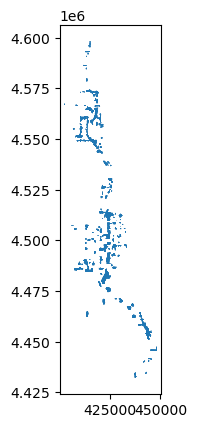

In [396]:
gdf_se_calcs2 = gpd.read_file("intermediate/se_calcs2.geojson")
display(gdf_se_calcs2)
gdf_se_calcs2.plot()

In [397]:
gdf_se_calcs2['f_ch']

0         511.967365
1         956.948345
2        1181.831206
3         207.894666
4         634.598468
            ...     
11056    1120.633065
11057    1137.752708
11058       0.000000
11059       0.000000
11060       0.000000
Name: f_ch, Length: 11061, dtype: float64

In [398]:
lst_project_taz = gdf_se_calcs2['TAZID'].drop_duplicates().tolist()
display(lst_project_taz)

[2496,
 2503,
 2504,
 2505,
 2498,
 2511,
 2513,
 2514,
 2535,
 2510,
 2512,
 2936,
 2933,
 2928,
 2929,
 2934,
 2930,
 2931,
 3069,
 3068,
 3066,
 3067,
 3039,
 3052,
 3058,
 3059,
 3079,
 3080,
 3082,
 3064,
 3065,
 3040,
 3081,
 2365,
 2361,
 2353,
 2363,
 2354,
 2367,
 2358,
 2333,
 2356,
 2868,
 2894,
 2935,
 2932,
 2887,
 2927,
 2888,
 2575,
 2704,
 2703,
 2702,
 2729,
 2728,
 2726,
 2700,
 2577,
 2701,
 2727,
 3144,
 3145,
 3147,
 3151,
 3150,
 3152,
 3149,
 3148,
 3154,
 2817,
 2824,
 2837,
 2813,
 2838,
 2820,
 2843,
 2834,
 2839,
 2841,
 2863,
 2864,
 2872,
 2840,
 2873,
 3335,
 3345,
 3347,
 3351,
 3364,
 3346,
 3365,
 3352,
 3353,
 3337,
 3336,
 2756,
 2755,
 2736,
 2733,
 2731,
 2764,
 2758,
 2757,
 2770,
 2771,
 2715,
 2772,
 2774,
 2791,
 2792,
 2811,
 2807,
 2809,
 2835,
 2810,
 2793,
 2808,
 702,
 703,
 723,
 739,
 724,
 730,
 712,
 713,
 690,
 691,
 696,
 697,
 1981,
 1999,
 2000,
 2013,
 2014,
 2015,
 2063,
 2064,
 1950,
 1951,
 1959,
 1960,
 1971,
 1984,
 1985,
 198

# Proportionally remove added growth from other TAZs in county to maintain totals

In [399]:
gdf_se_calcs2_grouped = gdf_se_calcs2[['TAZID','parameter','se_year_F','center_type','s_ch','f_ch']].groupby(['TAZID','se_year_F','parameter','center_type'], as_index=False).sum()
gdf_se_calcs2_grouped

,TAZID,se_year_F,parameter,center_type,s_ch,f_ch
0,19,2032,TOTEMP,Neighborhood Center,0.0,0.0
1,19,2032,TOTHH,Neighborhood Center,0.0,0.0
2,19,2032,TOTHHEMP,Neighborhood Center,0.0,0.0
3,19,2042,TOTEMP,Neighborhood Center,0.0,0.0
4,19,2042,TOTHH,Neighborhood Center,0.0,0.0
...,...,...,...,...,...,...
10714,3407,2042,TOTHH,Neighborhood Center,0.0,0.0
10715,3407,2042,TOTHHEMP,Neighborhood Center,0.0,0.0
10716,3407,2050,TOTEMP,Neighborhood Center,0.0,0.0
10717,3407,2050,TOTHH,Neighborhood Center,0.0,0.0


In [400]:
# get employment categories splits for region

df_emp_cat = pd.DataFrame([
    ['RETEMP','RETL'],
    ['RETEMP','FOOD'],
    ['OTHEMP','OFFI'],
    ['OTHEMP','GVED'],
    ['OTHEMP','HLTH'],
    ['OTHEMP','OTHR'],
    ['INDEMP','MANU'],
    ['INDEMP','WSLE'],
], columns=['EMP3CAT','parameter'])
display(df_emp_cat)

df_se_data_emp3cat = pd.merge(df_se_data_remove_emp_subtotals, df_emp_cat, on='parameter')
display(df_se_data_emp3cat)

,EMP3CAT,parameter
0,RETEMP,RETL
1,RETEMP,FOOD
2,OTHEMP,OFFI
3,OTHEMP,GVED
4,OTHEMP,HLTH
5,OTHEMP,OTHR
6,INDEMP,MANU
7,INDEMP,WSLE


,TAZID,CO_FIPS,parameter,value_F,se_year_F,EMP3CAT
0,1,3,RETL,0.0,2032,RETEMP
1,2,3,RETL,0.0,2032,RETEMP
2,3,3,RETL,0.0,2032,RETEMP
3,4,3,RETL,0.0,2032,RETEMP
4,5,3,RETL,0.4,2032,RETEMP
...,...,...,...,...,...,...
85099,3542,49,OTHR,0.0,2050,OTHEMP
85100,3543,49,OTHR,0.0,2050,OTHEMP
85101,3544,49,OTHR,0.0,2050,OTHEMP
85102,3545,49,OTHR,0.0,2050,OTHEMP


In [401]:
df_se_data_emp8cat_total = df_se_data_emp3cat.drop(columns=['TAZID']).groupby(['se_year_F','parameter','EMP3CAT'], as_index=False).sum().rename(columns={'value_F':'emp8'})
display(df_se_data_emp8cat_total)

df_se_data_emp3cat_total = df_se_data_emp3cat.drop(columns=['TAZID','parameter']).groupby(['se_year_F','EMP3CAT'], as_index=False).sum().rename(columns={'value_F':'emp3'})
display(df_se_data_emp3cat_total)

,se_year_F,parameter,EMP3CAT,CO_FIPS,emp8
0,2032,FOOD,RETEMP,139474,118684.0
1,2032,GVED,OTHEMP,139474,307869.0
2,2032,HLTH,OTHEMP,139474,187136.4
3,2032,MANU,INDEMP,139474,134557.8
4,2032,OFFI,OTHEMP,139474,280360.2
5,2032,OTHR,OTHEMP,139474,513247.4
6,2032,RETL,RETEMP,139474,165488.2
7,2032,WSLE,INDEMP,139474,148138.6
8,2042,FOOD,RETEMP,139474,123913.8
9,2042,GVED,OTHEMP,139474,335164.4


,se_year_F,EMP3CAT,CO_FIPS,emp3
0,2032,INDEMP,278948,282696.4
1,2032,OTHEMP,557896,1288613.0
2,2032,RETEMP,278948,284172.2
3,2042,INDEMP,278948,280782.7
4,2042,OTHEMP,557896,1451160.4
5,2042,RETEMP,278948,322919.3
6,2050,INDEMP,278948,279022.1
7,2050,OTHEMP,557896,1574380.9
8,2050,RETEMP,278948,364175.1


In [402]:
df_se_data_emp_portions = pd.merge(df_se_data_emp3cat_total, df_se_data_emp8cat_total, on=('se_year_F','EMP3CAT'))
df_se_data_emp_portions['emp8portion3'] = df_se_data_emp_portions['emp8'] / df_se_data_emp_portions['emp3']
df_se_data_emp_portions.rename(columns={'parameter':'EMP8CAT'}, inplace=True)
df_se_data_emp_portions.drop(columns=['emp3','emp8'], inplace=True)
df_se_data_emp_portions

,se_year_F,EMP3CAT,CO_FIPS_x,EMP8CAT,CO_FIPS_y,emp8portion3
0,2032,INDEMP,278948,MANU,139474,0.475980
1,2032,INDEMP,278948,WSLE,139474,0.524020
2,2032,OTHEMP,557896,GVED,139474,0.238915
3,2032,OTHEMP,557896,HLTH,139474,0.145223
4,2032,OTHEMP,557896,OFFI,139474,0.217567
5,2032,OTHEMP,557896,OTHR,139474,0.398294
6,2032,RETEMP,278948,FOOD,139474,0.417648
7,2032,RETEMP,278948,RETL,139474,0.582352
8,2042,INDEMP,278948,MANU,139474,0.501159
9,2042,INDEMP,278948,WSLE,139474,0.498841


In [403]:
df_centers[['office', 'retail']] = df_centers['office_retail_split'].str.split("/", expand=True)

# Convert the new columns to numeric types
df_centers['OTHEMP'] = pd.to_numeric(df_centers['office'])
df_centers['RETEMP'] = pd.to_numeric(df_centers['retail'])

# Divide the columns by 100
df_centers['OTHEMP'] = df_centers['OTHEMP'] / 100
df_centers['RETEMP'] = df_centers['RETEMP'] / 100

df_centers_office_retail = pd.melt(df_centers, id_vars=['center_type'], value_vars=['OTHEMP', 'RETEMP'], 
                                   var_name='EMP3CAT', value_name='split')

df_centers_office_retail

,center_type,EMP3CAT,split
0,Neighborhood Center,OTHEMP,0.2
1,City Center,OTHEMP,0.3
2,Urban Center,OTHEMP,0.5
3,Metropolitan Center,OTHEMP,0.8
4,Neighborhood Center,RETEMP,0.8
5,City Center,RETEMP,0.7
6,Urban Center,RETEMP,0.5
7,Metropolitan Center,RETEMP,0.2


# Add Employment

In [404]:
df_emp_add = gdf_se_calcs2_grouped[(gdf_se_calcs2_grouped['parameter']=='TOTEMP')].copy()
df_emp_add.drop(columns=['f_ch'], inplace = True)
df_emp_add = df_emp_add[df_emp_add['parameter']=='TOTEMP'].copy()
df_emp_add.drop(columns=['parameter'], inplace=True)
df_emp_add

,TAZID,se_year_F,center_type,s_ch
0,19,2032,Neighborhood Center,0.0
3,19,2042,Neighborhood Center,0.0
6,19,2050,Neighborhood Center,0.0
9,20,2032,Neighborhood Center,0.0
12,20,2042,Neighborhood Center,0.0
...,...,...,...,...
10704,3406,2042,Neighborhood Center,0.0
10707,3406,2050,Neighborhood Center,0.0
10710,3407,2032,Neighborhood Center,0.0
10713,3407,2042,Neighborhood Center,0.0


In [405]:
df_emp_add.groupby(['se_year_F']).sum()

,TAZID,s_ch
se_year_F,,
2032,1814855,789799.57833
2042,1814855,789799.57833
2050,1814855,789799.57833


In [406]:
df_emp_add_3split = pd.merge(df_emp_add, df_centers_office_retail, on='center_type')
df_emp_add_3split['s_ch_emp3'] = df_emp_add_3split['s_ch'] * df_emp_add_3split['split']
df_emp_add_3split

,TAZID,se_year_F,center_type,s_ch,EMP3CAT,split,s_ch_emp3
0,19,2032,Neighborhood Center,0.0,OTHEMP,0.2,0.0
1,19,2032,Neighborhood Center,0.0,RETEMP,0.8,0.0
2,19,2042,Neighborhood Center,0.0,OTHEMP,0.2,0.0
3,19,2042,Neighborhood Center,0.0,RETEMP,0.8,0.0
4,19,2050,Neighborhood Center,0.0,OTHEMP,0.2,0.0
...,...,...,...,...,...,...,...
7141,3030,2032,Urban Center,0.0,RETEMP,0.5,0.0
7142,3030,2042,Urban Center,0.0,OTHEMP,0.5,0.0
7143,3030,2042,Urban Center,0.0,RETEMP,0.5,0.0
7144,3030,2050,Urban Center,0.0,OTHEMP,0.5,0.0


In [407]:
df_emp_add_3split.groupby(['se_year_F']).sum()

,TAZID,s_ch,split,s_ch_emp3
se_year_F,,,,
2032,3629710,1.579599e+06,1191.0,789799.57833
2042,3629710,1.579599e+06,1191.0,789799.57833
2050,3629710,1.579599e+06,1191.0,789799.57833


In [408]:
df_emp_add_3split_8split = pd.merge(df_emp_add_3split, df_se_data_emp_portions, on=('se_year_F','EMP3CAT'))
df_emp_add_3split_8split['s_ch_cat8emp'] = df_emp_add_3split_8split['s_ch_emp3'] * df_emp_add_3split_8split['emp8portion3']
df_emp_add_3split_8split

,TAZID,se_year_F,center_type,s_ch,EMP3CAT,split,s_ch_emp3,CO_FIPS_x,EMP8CAT,CO_FIPS_y,emp8portion3,s_ch_cat8emp
0,19,2032,Neighborhood Center,0.000000,OTHEMP,0.2,0.000000,557896,GVED,139474,0.238915,0.00000
1,19,2032,Neighborhood Center,0.000000,OTHEMP,0.2,0.000000,557896,HLTH,139474,0.145223,0.00000
2,19,2032,Neighborhood Center,0.000000,OTHEMP,0.2,0.000000,557896,OFFI,139474,0.217567,0.00000
3,19,2032,Neighborhood Center,0.000000,OTHEMP,0.2,0.000000,557896,OTHR,139474,0.398294,0.00000
4,20,2032,Neighborhood Center,0.000000,OTHEMP,0.2,0.000000,557896,GVED,139474,0.238915,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
21433,3027,2050,Urban Center,161.755578,RETEMP,0.5,80.877789,278948,RETL,139474,0.620659,50.19756
21434,3028,2050,Urban Center,1.707701,RETEMP,0.5,0.853850,278948,FOOD,139474,0.379341,0.32390
21435,3028,2050,Urban Center,1.707701,RETEMP,0.5,0.853850,278948,RETL,139474,0.620659,0.52995
21436,3030,2050,Urban Center,0.000000,RETEMP,0.5,0.000000,278948,FOOD,139474,0.379341,0.00000


In [409]:
df_emp_add_3split_8split.groupby(['se_year_F']).sum()

,TAZID,s_ch,split,s_ch_emp3,CO_FIPS_x,CO_FIPS_y,emp8portion3,s_ch_cat8emp
se_year_F,,,,,,,,
2032,10889130,4.738797e+06,3249.2,2.339408e+06,3322270680,996681204,2382.0,789799.57833
2042,10889130,4.738797e+06,3249.2,2.339408e+06,3322270680,996681204,2382.0,789799.57833
2050,10889130,4.738797e+06,3249.2,2.339408e+06,3322270680,996681204,2382.0,789799.57833


In [410]:
df_emp_add_3split_8split_taz = df_emp_add_3split_8split[['TAZID','se_year_F','EMP3CAT','EMP8CAT','s_ch_cat8emp']].groupby(['TAZID','se_year_F','EMP3CAT','EMP8CAT'], as_index=False).sum()
df_emp_add_3split_8split_taz

,TAZID,se_year_F,EMP3CAT,EMP8CAT,s_ch_cat8emp
0,19,2032,OTHEMP,GVED,0.0
1,19,2032,OTHEMP,HLTH,0.0
2,19,2032,OTHEMP,OFFI,0.0
3,19,2032,OTHEMP,OTHR,0.0
4,19,2032,RETEMP,FOOD,0.0
...,...,...,...,...,...
20353,3407,2050,OTHEMP,HLTH,0.0
20354,3407,2050,OTHEMP,OFFI,0.0
20355,3407,2050,OTHEMP,OTHR,0.0
20356,3407,2050,RETEMP,FOOD,0.0


In [411]:
df_emp_add_3split_8split_taz.groupby(['se_year_F']).sum()

,TAZID,s_ch_cat8emp
se_year_F,,
2032,10299240,789799.57833
2042,10299240,789799.57833
2050,10299240,789799.57833


In [412]:
# add subotals
df_emp_add_with_subtotals = pd.merge(df_emp_add_3split_8split_taz, df_emp_subcategories, left_on='EMP8CAT', right_on='EMPCAT')
df_emp_add_with_subtotals

,TAZID,se_year_F,EMP3CAT,EMP8CAT,s_ch_cat8emp,EMPGROUP,EMPCAT,SUB03,SUB08,SUB11,BASE08,BASE11
0,19,2032,OTHEMP,GVED,0.0,OTHEMP,GVED,1,0,0,0,0
1,19,2032,OTHEMP,GVED,0.0,TOTEMP,GVED,0,1,0,0,0
2,19,2032,OTHEMP,GVED,0.0,ALLEMP,GVED,0,0,1,0,0
3,19,2032,OTHEMP,GVED,0.0,GVED,GVED,0,0,0,1,1
4,19,2042,OTHEMP,GVED,0.0,OTHEMP,GVED,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
81427,3407,2042,RETEMP,RETL,0.0,RETL,RETL,0,0,0,1,1
81428,3407,2050,RETEMP,RETL,0.0,RETEMP,RETL,1,0,0,0,0
81429,3407,2050,RETEMP,RETL,0.0,TOTEMP,RETL,0,1,0,0,0
81430,3407,2050,RETEMP,RETL,0.0,ALLEMP,RETL,0,0,1,0,0


In [413]:
df_emp_add_final = df_emp_add_with_subtotals[['TAZID','se_year_F','EMPGROUP','s_ch_cat8emp']].groupby(['TAZID','se_year_F','EMPGROUP'], as_index=False).sum()
df_emp_add_final

,TAZID,se_year_F,EMPGROUP,s_ch_cat8emp
0,19,2032,ALLEMP,0.0
1,19,2032,FOOD,0.0
2,19,2032,GVED,0.0
3,19,2032,HLTH,0.0
4,19,2032,OFFI,0.0
...,...,...,...,...
33925,3407,2050,OTHEMP,0.0
33926,3407,2050,OTHR,0.0
33927,3407,2050,RETEMP,0.0
33928,3407,2050,RETL,0.0


In [414]:
df_emp_add_final[df_emp_add_final['EMPGROUP']=='TOTEMP'].groupby(['se_year_F']).sum()

,TAZID,s_ch_cat8emp
se_year_F,,
2032,1716540,789799.57833
2042,1716540,789799.57833
2050,1716540,789799.57833


# Remove employment

In [415]:
df_emp_del = gdf_se_calcs2_grouped[(gdf_se_calcs2_grouped['parameter']=='TOTEMP')].copy()
df_emp_del.drop(columns=['s_ch'], inplace = True)
df_emp_del = df_emp_del[df_emp_del['parameter']=='TOTEMP'].copy()
df_emp_del.drop(columns=['parameter'], inplace=True)
df_emp_del

,TAZID,se_year_F,center_type,f_ch
0,19,2032,Neighborhood Center,0.0
3,19,2042,Neighborhood Center,0.0
6,19,2050,Neighborhood Center,0.0
9,20,2032,Neighborhood Center,0.0
12,20,2042,Neighborhood Center,0.0
...,...,...,...,...
10704,3406,2042,Neighborhood Center,0.0
10707,3406,2050,Neighborhood Center,0.0
10710,3407,2032,Neighborhood Center,0.0
10713,3407,2042,Neighborhood Center,0.0


In [416]:
df_emp_del[df_emp_del['TAZID']==1384]

,TAZID,se_year_F,center_type,f_ch
5148,1384,2032,Urban Center,1600.286518
5151,1384,2042,Urban Center,2661.016353
5154,1384,2050,Urban Center,2765.189704


In [417]:
df_emp_sub08 = df_emp_subcategories[df_emp_subcategories['SUB08']==1]
df_emp_sub08

,EMPGROUP,EMPCAT,SUB03,SUB08,SUB11,BASE08,BASE11
8,TOTEMP,RETL,0,1,0,0,0
9,TOTEMP,FOOD,0,1,0,0,0
10,TOTEMP,MANU,0,1,0,0,0
11,TOTEMP,WSLE,0,1,0,0,0
12,TOTEMP,OFFI,0,1,0,0,0
13,TOTEMP,GVED,0,1,0,0,0
14,TOTEMP,OTHR,0,1,0,0,0
15,TOTEMP,HLTH,0,1,0,0,0


In [418]:
# add subotals
df_se_data_totemp = df_se_data[df_se_data['parameter']=='TOTEMP'].copy()
df_se_data_totemp.rename(columns={'value_F':'value_F_TOTEMP','parameter':'EMPGROUP'}, inplace=True)
df_se_data_totemp

,TAZID,CO_FIPS,EMPGROUP,value_F_TOTEMP,se_year_F
14184,1,3,TOTEMP,0.0,2032
14185,2,3,TOTEMP,0.0,2032
14186,3,3,TOTEMP,0.0,2032
14187,4,3,TOTEMP,0.0,2032
14188,5,3,TOTEMP,7.3,2032
...,...,...,...,...,...
195025,3542,49,TOTEMP,0.0,2050
195026,3543,49,TOTEMP,0.0,2050
195027,3544,49,TOTEMP,0.0,2050
195028,3545,49,TOTEMP,0.0,2050


In [419]:
df_se_data_cat8emp = pd.merge(df_se_data, df_emp_sub08, left_on='parameter', right_on='EMPCAT')
df_se_data_cat8emp

,TAZID,CO_FIPS,parameter,value_F,se_year_F,EMPGROUP,EMPCAT,SUB03,SUB08,SUB11,BASE08,BASE11
0,1,3,RETL,0.0,2032,TOTEMP,RETL,0,1,0,0,0
1,2,3,RETL,0.0,2032,TOTEMP,RETL,0,1,0,0,0
2,3,3,RETL,0.0,2032,TOTEMP,RETL,0,1,0,0,0
3,4,3,RETL,0.0,2032,TOTEMP,RETL,0,1,0,0,0
4,5,3,RETL,0.4,2032,TOTEMP,RETL,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
85099,3542,49,OTHR,0.0,2050,TOTEMP,OTHR,0,1,0,0,0
85100,3543,49,OTHR,0.0,2050,TOTEMP,OTHR,0,1,0,0,0
85101,3544,49,OTHR,0.0,2050,TOTEMP,OTHR,0,1,0,0,0
85102,3545,49,OTHR,0.0,2050,TOTEMP,OTHR,0,1,0,0,0


In [420]:
df_se_data_cat8empPortionTotEmp = pd.merge(df_se_data_cat8emp, df_se_data_totemp, on=['TAZID','se_year_F','EMPGROUP'])
df_se_data_cat8empPortionTotEmp['cat8empPortionTotEmp'] = df_se_data_cat8empPortionTotEmp['value_F'] / df_se_data_cat8empPortionTotEmp['value_F_TOTEMP']
df_se_data_cat8empPortionTotEmp['cat8empPortionTotEmp'].fillna(0, inplace=True)
df_se_data_cat8empPortionTotEmp = df_se_data_cat8empPortionTotEmp[['se_year_F','TAZID','parameter','cat8empPortionTotEmp']]
df_se_data_cat8empPortionTotEmp

,se_year_F,TAZID,parameter,cat8empPortionTotEmp
0,2032,1,RETL,0.0
1,2032,1,FOOD,0.0
2,2032,1,MANU,0.0
3,2032,1,WSLE,0.0
4,2032,1,OFFI,0.0
...,...,...,...,...
85099,2050,3546,WSLE,0.0
85100,2050,3546,OFFI,0.0
85101,2050,3546,GVED,0.0
85102,2050,3546,HLTH,0.0


In [421]:
df_se_data_cat8empPortionTotEmp.groupby(['se_year_F'], as_index=False).sum()

,se_year_F,TAZID,cat8empPortionTotEmp
0,2032,50310648,2587.0
1,2042,50310648,2652.0
2,2050,50310648,2706.0


In [422]:
df_emp_del_with_portion = pd.merge(df_emp_del, df_se_data_cat8empPortionTotEmp, on=['se_year_F','TAZID'])
df_emp_del_with_portion['f_ch_cat8emp'] = df_emp_del_with_portion['f_ch'] * df_emp_del_with_portion['cat8empPortionTotEmp']
df_emp_del_with_portion

,TAZID,se_year_F,center_type,f_ch,parameter,cat8empPortionTotEmp,f_ch_cat8emp
0,19,2032,Neighborhood Center,0.0,RETL,0.291572,0.0
1,19,2032,Neighborhood Center,0.0,FOOD,0.038724,0.0
2,19,2032,Neighborhood Center,0.0,MANU,0.164009,0.0
3,19,2032,Neighborhood Center,0.0,WSLE,0.205011,0.0
4,19,2032,Neighborhood Center,0.0,OFFI,0.027335,0.0
...,...,...,...,...,...,...,...
28579,3407,2050,Neighborhood Center,0.0,WSLE,0.026882,0.0
28580,3407,2050,Neighborhood Center,0.0,OFFI,0.021505,0.0
28581,3407,2050,Neighborhood Center,0.0,GVED,0.037634,0.0
28582,3407,2050,Neighborhood Center,0.0,HLTH,0.096774,0.0


In [423]:
df_emp_del_with_portion.groupby('se_year_F').sum()

,TAZID,f_ch,cat8empPortionTotEmp,f_ch_cat8emp
se_year_F,,,,
2032,14518840,4.458109e+06,1137.0,557263.666882
2042,14518840,4.836928e+06,1144.0,604615.943821
2050,14518840,5.118131e+06,1142.0,639766.424124


In [424]:
df_emp_subcategories

,EMPGROUP,EMPCAT,SUB03,SUB08,SUB11,BASE08,BASE11
0,RETEMP,RETL,1,0,0,0,0
1,RETEMP,FOOD,1,0,0,0,0
2,INDEMP,MANU,1,0,0,0,0
3,INDEMP,WSLE,1,0,0,0,0
4,OTHEMP,OFFI,1,0,0,0,0
5,OTHEMP,GVED,1,0,0,0,0
6,OTHEMP,OTHR,1,0,0,0,0
7,OTHEMP,HLTH,1,0,0,0,0
8,TOTEMP,RETL,0,1,0,0,0
9,TOTEMP,FOOD,0,1,0,0,0


In [425]:
df_emp_del_with_subtotals = pd.merge(df_emp_del_with_portion, df_emp_subcategories[['EMPGROUP','EMPCAT']], left_on='parameter', right_on='EMPCAT')
df_emp_del_with_subtotals

,TAZID,se_year_F,center_type,f_ch,parameter,cat8empPortionTotEmp,f_ch_cat8emp,EMPGROUP,EMPCAT
0,19,2032,Neighborhood Center,0.0,RETL,0.291572,0.0,RETEMP,RETL
1,19,2032,Neighborhood Center,0.0,RETL,0.291572,0.0,TOTEMP,RETL
2,19,2032,Neighborhood Center,0.0,RETL,0.291572,0.0,ALLEMP,RETL
3,19,2032,Neighborhood Center,0.0,RETL,0.291572,0.0,RETL,RETL
4,19,2042,Neighborhood Center,0.0,RETL,0.316430,0.0,RETEMP,RETL
...,...,...,...,...,...,...,...,...,...
114331,3407,2042,Neighborhood Center,0.0,OTHR,0.500000,0.0,OTHR,OTHR
114332,3407,2050,Neighborhood Center,0.0,OTHR,0.500000,0.0,OTHEMP,OTHR
114333,3407,2050,Neighborhood Center,0.0,OTHR,0.500000,0.0,TOTEMP,OTHR
114334,3407,2050,Neighborhood Center,0.0,OTHR,0.500000,0.0,ALLEMP,OTHR


In [426]:
df_emp_del_final = df_emp_del_with_subtotals[['TAZID','se_year_F','EMPGROUP','f_ch_cat8emp']].groupby(['TAZID','se_year_F','EMPGROUP'], as_index=False).sum()
df_emp_del_final

,TAZID,se_year_F,EMPGROUP,f_ch_cat8emp
0,19,2032,ALLEMP,0.0
1,19,2032,FOOD,0.0
2,19,2032,GVED,0.0
3,19,2032,HLTH,0.0
4,19,2032,INDEMP,0.0
...,...,...,...,...
44104,3407,2050,OTHR,0.0
44105,3407,2050,RETEMP,0.0
44106,3407,2050,RETL,0.0
44107,3407,2050,TOTEMP,0.0


In [427]:
df_emp_del_final[df_emp_del_final['EMPGROUP']=='TOTEMP'].groupby(['se_year_F'], as_index=False).sum()

,se_year_F,TAZID,f_ch_cat8emp
0,2032,1716540,557263.666882
1,2042,1716540,604615.943821
2,2050,1716540,639766.424124


In [428]:
df_se_data[(df_se_data['TAZID']==1384) & (df_se_data['se_year_F']==2050)]

,TAZID,CO_FIPS,parameter,value_F,se_year_F
178683,1384,35,CO_TAZID,350479.000000,2050
182229,1384,35,TOTHH,340.166667,2050
185775,1384,35,HHPOP,799.281059,2050
189321,1384,35,HHSIZE,2.349675,2050
192867,1384,35,TOTEMP,3008.333333,2050
196413,1384,35,RETEMP,1553.833333,2050
199959,1384,35,INDEMP,75.666667,2050
203505,1384,35,OTHEMP,1378.833333,2050
207051,1384,35,ALLEMP,3218.713388,2050
210597,1384,35,RETL,986.000000,2050


In [429]:
df_emp_del_final[df_emp_del_final['TAZID']==1384]

,TAZID,se_year_F,EMPGROUP,f_ch_cat8emp
21294,1384,2032,ALLEMP,1600.286518
21295,1384,2032,FOOD,493.444656
21296,1384,2032,GVED,10.110943
21297,1384,2032,HLTH,0.612784
21298,1384,2032,INDEMP,87.474976
21299,1384,2032,MANU,2.144745
21300,1384,2032,OFFI,171.426442
21301,1384,2032,OTHEMP,387.739343
21302,1384,2032,OTHR,205.589174
21303,1384,2032,RETEMP,1125.072199


# Finish up employment

In [430]:
df_emp_changes = pd.merge(df_emp_add_final, df_emp_del_final, on=['TAZID','se_year_F','EMPGROUP'], how='outer')
df_emp_changes[['s_ch_cat8emp','f_ch_cat8emp']] = df_emp_changes[['s_ch_cat8emp','f_ch_cat8emp']].fillna(0)
df_emp_changes

,TAZID,se_year_F,EMPGROUP,s_ch_cat8emp,f_ch_cat8emp
0,19,2032,ALLEMP,0.0,0.0
1,19,2032,FOOD,0.0,0.0
2,19,2032,GVED,0.0,0.0
3,19,2032,HLTH,0.0,0.0
4,19,2032,OFFI,0.0,0.0
...,...,...,...,...,...
44104,3407,2042,MANU,0.0,0.0
44105,3407,2042,WSLE,0.0,0.0
44106,3407,2050,INDEMP,0.0,0.0
44107,3407,2050,MANU,0.0,0.0


In [431]:
df_emp_changes[df_emp_changes['EMPGROUP']=='TOTEMP'].groupby(['se_year_F']).sum()

,TAZID,s_ch_cat8emp,f_ch_cat8emp
se_year_F,,,
2032,1716540,789799.57833,557263.666882
2042,1716540,789799.57833,604615.943821
2050,1716540,789799.57833,639766.424124


In [432]:
df_emp_changes['final_ch'] = -1 * df_emp_changes['f_ch_cat8emp'] + df_emp_changes['s_ch_cat8emp']
df_emp_changes.rename(columns={'EMPGROUP':'parameter'}, inplace=True)
df_emp_changes

,TAZID,se_year_F,parameter,s_ch_cat8emp,f_ch_cat8emp,final_ch
0,19,2032,ALLEMP,0.0,0.0,0.0
1,19,2032,FOOD,0.0,0.0,0.0
2,19,2032,GVED,0.0,0.0,0.0
3,19,2032,HLTH,0.0,0.0,0.0
4,19,2032,OFFI,0.0,0.0,0.0
...,...,...,...,...,...,...
44104,3407,2042,MANU,0.0,0.0,0.0
44105,3407,2042,WSLE,0.0,0.0,0.0
44106,3407,2050,INDEMP,0.0,0.0,0.0
44107,3407,2050,MANU,0.0,0.0,0.0


In [433]:
df_emp_changes[df_emp_changes['parameter']=='TOTEMP'].groupby(['se_year_F']).sum()

,TAZID,s_ch_cat8emp,f_ch_cat8emp,final_ch
se_year_F,,,,
2032,1716540,789799.57833,557263.666882,232535.911447
2042,1716540,789799.57833,604615.943821,185183.634509
2050,1716540,789799.57833,639766.424124,150033.154206


In [434]:
df_se_data

,TAZID,CO_FIPS,parameter,value_F,se_year_F
0,1,3,CO_TAZID,30001.0,2032
1,2,3,CO_TAZID,30002.0,2032
2,3,3,CO_TAZID,30003.0,2032
3,4,3,CO_TAZID,30004.0,2032
4,5,3,CO_TAZID,30005.0,2032
...,...,...,...,...,...
265945,3542,49,Enrol_High,0.0,2050
265946,3543,49,Enrol_High,0.0,2050
265947,3544,49,Enrol_High,0.0,2050
265948,3545,49,Enrol_High,0.0,2050


In [435]:
df_se_data_with_emp_changes = pd.merge(df_se_data, df_emp_changes, on=['se_year_F','TAZID','parameter'])
df_se_data_with_emp_changes['value_S'] = round(df_se_data_with_emp_changes['value_F'] + df_se_data_with_emp_changes['final_ch'],4)
df_se_data_with_emp_changes

,TAZID,CO_FIPS,parameter,value_F,se_year_F,s_ch_cat8emp,f_ch_cat8emp,final_ch,value_S
0,19,3,TOTEMP,43.9,2032,0.0,0.0,0.0,43.9
1,20,3,TOTEMP,117.2,2032,0.0,0.0,0.0,117.2
2,25,3,TOTEMP,151.9,2032,0.0,0.0,0.0,151.9
3,26,3,TOTEMP,178.7,2032,0.0,0.0,0.0,178.7
4,30,3,TOTEMP,83.3,2032,0.0,0.0,0.0,83.3
...,...,...,...,...,...,...,...,...,...
44104,3388,49,OTHR,536.0,2050,0.0,0.0,0.0,536.0
44105,3394,49,OTHR,110.0,2050,0.0,0.0,0.0,110.0
44106,3405,49,OTHR,77.0,2050,0.0,0.0,0.0,77.0
44107,3406,49,OTHR,44.0,2050,0.0,0.0,0.0,44.0


In [436]:
# check for negative SE
df_se_data_with_emp_changes[df_se_data_with_emp_changes['value_S']<0]

,TAZID,CO_FIPS,parameter,value_F,se_year_F,s_ch_cat8emp,f_ch_cat8emp,final_ch,value_S


In [437]:
df_se_data_with_emp_changes[df_se_data_with_emp_changes['TAZID']==679]

,TAZID,CO_FIPS,parameter,value_F,se_year_F,s_ch_cat8emp,f_ch_cat8emp,final_ch,value_S
259,679,11,TOTEMP,428.833333,2032,464.905041,236.101964,228.803077,657.6364
1390,679,11,RETEMP,67.500000,2032,325.433528,37.163348,288.270180,355.7702
2521,679,11,INDEMP,4.000000,2032,0.000000,2.202272,-2.202272,1.7977
3652,679,11,OTHEMP,357.333333,2032,139.471512,196.736343,-57.264831,300.0685
4783,679,11,ALLEMP,532.214424,2032,464.905041,236.101964,228.803077,761.0175
5914,679,11,RETL,35.500000,2032,189.516810,19.545168,169.971642,205.4716
7045,679,11,FOOD,32.000000,2032,135.916718,17.618180,118.298538,150.2985
8176,679,11,MANU,1.666667,2032,0.000000,0.917614,-0.917614,0.7491
9307,679,11,WSLE,2.333333,2032,0.000000,1.284659,-1.284659,1.0487
10438,679,11,OFFI,52.166667,2032,30.344456,28.721304,1.623153,53.7898


In [438]:
df_se_data_with_emp_changes_final = df_se_data_with_emp_changes[['se_year_F','TAZID','parameter','s_ch_cat8emp','f_ch_cat8emp','final_ch','value_S']].rename(columns={'s_ch_cat8emp':'s_ch', 'f_ch_cat8emp':'f_ch'})
df_se_data_with_emp_changes_final

,se_year_F,TAZID,parameter,s_ch,f_ch,final_ch,value_S
0,2032,19,TOTEMP,0.0,0.0,0.0,43.9
1,2032,20,TOTEMP,0.0,0.0,0.0,117.2
2,2032,25,TOTEMP,0.0,0.0,0.0,151.9
3,2032,26,TOTEMP,0.0,0.0,0.0,178.7
4,2032,30,TOTEMP,0.0,0.0,0.0,83.3
...,...,...,...,...,...,...,...
44104,2050,3388,OTHR,0.0,0.0,0.0,536.0
44105,2050,3394,OTHR,0.0,0.0,0.0,110.0
44106,2050,3405,OTHR,0.0,0.0,0.0,77.0
44107,2050,3406,OTHR,0.0,0.0,0.0,44.0


In [439]:
df_se_data_with_emp_changes_final = pd.merge(df_se_data_with_emp_changes_final, df_emp_cat[['parameter']], on='parameter')
df_se_data_with_emp_changes_final

,se_year_F,TAZID,parameter,s_ch,f_ch,final_ch,value_S
0,2032,19,RETL,0.0,0.0,0.0,12.8
1,2032,20,RETL,0.0,0.0,0.0,13.7
2,2032,25,RETL,0.0,0.0,0.0,5.0
3,2032,26,RETL,0.0,0.0,0.0,10.9
4,2032,30,RETL,0.0,0.0,0.0,7.9
...,...,...,...,...,...,...,...
27139,2050,3388,OTHR,0.0,0.0,0.0,536.0
27140,2050,3394,OTHR,0.0,0.0,0.0,110.0
27141,2050,3405,OTHR,0.0,0.0,0.0,77.0
27142,2050,3406,OTHR,0.0,0.0,0.0,44.0


In [440]:
df_se_data_with_emp_changes_final[df_se_data_with_emp_changes_final['TAZID']==1520]

,se_year_F,TAZID,parameter,s_ch,f_ch,final_ch,value_S
606,2032,1520,RETL,2.144181,0.053814,2.090367,11.4237
1737,2042,1520,RETL,2.269066,0.060541,2.208525,12.7085
2868,2050,1520,RETL,2.285227,0.061502,2.223725,12.8904
3999,2032,1520,FOOD,1.537753,0.070151,1.467603,13.6343
5130,2042,1520,FOOD,1.412869,0.067268,1.345601,13.0123
6261,2050,1520,FOOD,1.396707,0.066307,1.330400,12.8304
7392,2032,1520,MANU,0.000000,0.000000,0.000000,0.0000
8523,2042,1520,MANU,0.000000,0.000000,0.000000,0.0000
9654,2050,1520,MANU,0.000000,0.000000,0.000000,0.0000
10785,2032,1520,WSLE,0.000000,0.000961,-0.000961,0.1657


# Households/Population Added

In [441]:
df_centers_hhsize = df_centers[['center_type','household_size']]
df_centers_hhsize

,center_type,household_size
0,Neighborhood Center,1.62
1,City Center,1.62
2,Urban Center,1.62
3,Metropolitan Center,1.62


In [442]:
df_se_calcs2_hh = gdf_se_calcs2_grouped[gdf_se_calcs2_grouped['parameter']=='TOTHH'].copy()
df_se_calcs2_hh_add = df_se_calcs2_hh.drop(columns=['f_ch']) # scenario households are s_ch, forecast households are f_ch
df_se_calcs2_hh_add

,TAZID,se_year_F,parameter,center_type,s_ch
1,19,2032,TOTHH,Neighborhood Center,0.0
4,19,2042,TOTHH,Neighborhood Center,0.0
7,19,2050,TOTHH,Neighborhood Center,0.0
10,20,2032,TOTHH,Neighborhood Center,0.0
13,20,2042,TOTHH,Neighborhood Center,0.0
...,...,...,...,...,...
10705,3406,2042,TOTHH,Neighborhood Center,0.0
10708,3406,2050,TOTHH,Neighborhood Center,0.0
10711,3407,2032,TOTHH,Neighborhood Center,0.0
10714,3407,2042,TOTHH,Neighborhood Center,0.0


In [443]:
df_se_calcs2_pop_add = df_se_calcs2_hh.copy()
df_se_calcs2_pop_add = pd.merge(df_se_calcs2_pop_add, df_centers_hhsize, on='center_type')
df_se_calcs2_pop_add['parameter'] = 'HHPOP'
df_se_calcs2_pop_add['s_ch'] = df_se_calcs2_pop_add['s_ch'] * df_se_calcs2_pop_add['household_size']
df_se_calcs2_pop_add = df_se_calcs2_pop_add[['TAZID','se_year_F','parameter','center_type','s_ch']]
df_se_calcs2_pop_add

,TAZID,se_year_F,parameter,center_type,s_ch
0,19,2032,HHPOP,Neighborhood Center,0.0
1,19,2042,HHPOP,Neighborhood Center,0.0
2,19,2050,HHPOP,Neighborhood Center,0.0
3,20,2032,HHPOP,Neighborhood Center,0.0
4,20,2042,HHPOP,Neighborhood Center,0.0
...,...,...,...,...,...
3568,3028,2042,HHPOP,Urban Center,0.841971
3569,3028,2050,HHPOP,Urban Center,0.841971
3570,3030,2032,HHPOP,Urban Center,0.0
3571,3030,2042,HHPOP,Urban Center,0.0


In [444]:
df_se_calcs2_hh_pop_add = pd.concat([df_se_calcs2_hh_add, df_se_calcs2_pop_add])
df_se_calcs2_hh_pop_add = df_se_calcs2_hh_pop_add.groupby(['TAZID','se_year_F','parameter'], as_index=False).agg(s_ch=('s_ch','sum'))
df_se_calcs2_hh_pop_add

,TAZID,se_year_F,parameter,s_ch
0,19,2032,HHPOP,0.0
1,19,2032,TOTHH,0.0
2,19,2042,HHPOP,0.0
3,19,2042,TOTHH,0.0
4,19,2050,HHPOP,0.0
...,...,...,...,...
6781,3407,2032,TOTHH,0.0
6782,3407,2042,HHPOP,0.0
6783,3407,2042,TOTHH,0.0
6784,3407,2050,HHPOP,0.0


In [445]:
df_se_calcs2_hh_pop_add

,TAZID,se_year_F,parameter,s_ch
0,19,2032,HHPOP,0.0
1,19,2032,TOTHH,0.0
2,19,2042,HHPOP,0.0
3,19,2042,TOTHH,0.0
4,19,2050,HHPOP,0.0
...,...,...,...,...
6781,3407,2032,TOTHH,0.0
6782,3407,2042,HHPOP,0.0
6783,3407,2042,TOTHH,0.0
6784,3407,2050,HHPOP,0.0


In [446]:
df_se_calcs2_hh_pop_add.groupby(['se_year_F','parameter']).agg(s_ch=('s_ch','sum'))

s_ch
se_year_F parameter               
2032      HHPOP      504702.444767
          TOTHH      311544.718992
2042      HHPOP      504702.444767
          TOTHH      311544.718992
2050      HHPOP      504702.444767
          TOTHH      311544.718992

# Households/Pop Remove

In [447]:
df_se_calcs2_hh.groupby(['se_year_F','parameter']).sum()

,,TAZID,s_ch,f_ch
se_year_F,parameter,,,
2032,TOTHH,1814855,311544.718992,123230.083103
2042,TOTHH,1814855,311544.718992,157863.319249
2050,TOTHH,1814855,311544.718992,177816.250477


In [448]:
# gdf_se_calcs2_grouped are only project polygons
df_se_calcs2_hh = gdf_se_calcs2_grouped[(gdf_se_calcs2_grouped['parameter']=='TOTHH')].copy()
df_se_calcs2_hh_del = df_se_calcs2_hh.groupby(['TAZID','se_year_F','parameter'], as_index=False).agg(f_ch=('f_ch','sum'))
df_se_calcs2_hh_del

,TAZID,se_year_F,parameter,f_ch
0,19,2032,TOTHH,0.0
1,19,2042,TOTHH,0.0
2,19,2050,TOTHH,0.0
3,20,2032,TOTHH,0.0
4,20,2042,TOTHH,0.0
...,...,...,...,...
3388,3406,2042,TOTHH,0.0
3389,3406,2050,TOTHH,0.0
3390,3407,2032,TOTHH,0.0
3391,3407,2042,TOTHH,0.0


In [449]:
df_se_data_hhsize = df_se_data[df_se_data['parameter']=='HHSIZE'].rename(columns={'value_F':'hhsize'}).drop(columns=['parameter'])
df_se_data_hhsize

,TAZID,CO_FIPS,hhsize,se_year_F
10638,1,3,0.000000,2032
10639,2,3,5.344828,2032
10640,3,3,4.059603,2032
10641,4,3,3.200000,2032
10642,5,3,2.867572,2032
...,...,...,...,...
191479,3542,49,1.500000,2050
191480,3543,49,0.000000,2050
191481,3544,49,0.000000,2050
191482,3545,49,5.000000,2050


In [450]:
df_se_calcs2_pop_del = pd.merge(df_se_calcs2_hh_del.rename(columns={'f_ch':'hh'}).drop(columns=['parameter']), df_se_data_hhsize, on=['TAZID','se_year_F'])
df_se_calcs2_pop_del['parameter'] = 'HHPOP'
df_se_calcs2_pop_del['f_ch'] = df_se_calcs2_pop_del['hh'] * df_se_calcs2_pop_del['hhsize']
df_se_calcs2_pop_del.drop(columns=['hh','hhsize'], inplace=True)
df_se_calcs2_pop_del

,TAZID,se_year_F,CO_FIPS,parameter,f_ch
0,19,2032,3,HHPOP,0.0
1,19,2042,3,HHPOP,0.0
2,19,2050,3,HHPOP,0.0
3,20,2032,3,HHPOP,0.0
4,20,2042,3,HHPOP,0.0
...,...,...,...,...,...
3388,3406,2042,49,HHPOP,0.0
3389,3406,2050,49,HHPOP,0.0
3390,3407,2032,49,HHPOP,0.0
3391,3407,2042,49,HHPOP,0.0


In [451]:
df_se_calcs2_hh_pop_del = pd.concat([df_se_calcs2_hh_del, df_se_calcs2_pop_del])
df_se_calcs2_hh_pop_del

,TAZID,se_year_F,parameter,f_ch,CO_FIPS
0,19,2032,TOTHH,0.0,NaN
1,19,2042,TOTHH,0.0,NaN
2,19,2050,TOTHH,0.0,NaN
3,20,2032,TOTHH,0.0,NaN
4,20,2042,TOTHH,0.0,NaN
...,...,...,...,...,...
3388,3406,2042,HHPOP,0.0,49.0
3389,3406,2050,HHPOP,0.0,49.0
3390,3407,2032,HHPOP,0.0,49.0
3391,3407,2042,HHPOP,0.0,49.0


# Finish Up Households/Population Changes

In [452]:
#s_ch = scenario numbers on changeable land
#f_ch = forecast numbers on changeable land
#final_ch = scenario - forecast on changeable land (number in addition to forecast)--this is what is taken from other areas of county (redistributed)

df_hh_changes = pd.merge(df_se_calcs2_hh_pop_add, df_se_calcs2_hh_pop_del, on=['TAZID','se_year_F','parameter'], how='outer')
df_hh_changes = df_hh_changes.fillna(0)
df_hh_changes

,TAZID,se_year_F,parameter,s_ch,f_ch,CO_FIPS
0,19,2032,HHPOP,0.0,0.0,3.0
1,19,2032,TOTHH,0.0,0.0,0.0
2,19,2042,HHPOP,0.0,0.0,3.0
3,19,2042,TOTHH,0.0,0.0,0.0
4,19,2050,HHPOP,0.0,0.0,3.0
...,...,...,...,...,...,...
6781,3407,2032,TOTHH,0.0,0.0,0.0
6782,3407,2042,HHPOP,0.0,0.0,49.0
6783,3407,2042,TOTHH,0.0,0.0,0.0
6784,3407,2050,HHPOP,0.0,0.0,49.0


In [453]:
df_hh_changes['final_ch'] = df_hh_changes['s_ch'] - df_hh_changes['f_ch']
df_hh_changes

,TAZID,se_year_F,parameter,s_ch,f_ch,CO_FIPS,final_ch
0,19,2032,HHPOP,0.0,0.0,3.0,0.0
1,19,2032,TOTHH,0.0,0.0,0.0,0.0
2,19,2042,HHPOP,0.0,0.0,3.0,0.0
3,19,2042,TOTHH,0.0,0.0,0.0,0.0
4,19,2050,HHPOP,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...
6781,3407,2032,TOTHH,0.0,0.0,0.0,0.0
6782,3407,2042,HHPOP,0.0,0.0,49.0,0.0
6783,3407,2042,TOTHH,0.0,0.0,0.0,0.0
6784,3407,2050,HHPOP,0.0,0.0,49.0,0.0


In [454]:
df_hh_changes.groupby(['se_year_F','parameter']).sum()

TAZID           s_ch           f_ch  CO_FIPS  \
se_year_F parameter                                                   
2032      HHPOP      1716540  504702.444767  324326.498890  42861.0   
          TOTHH      1716540  311544.718992  123230.083103      0.0   
2042      HHPOP      1716540  504702.444767  395514.496452  42861.0   
          TOTHH      1716540  311544.718992  157863.319249      0.0   
2050      HHPOP      1716540  504702.444767  430158.302206  42861.0   
          TOTHH      1716540  311544.718992  177816.250477      0.0   

                          final_ch  
se_year_F parameter                 
2032      HHPOP      180375.945877  
          TOTHH      188314.635889  
2042      HHPOP      109187.948315  
          TOTHH      153681.399743  
2050      HHPOP       74544.142561  
          TOTHH      133728.468515

From webmap 2050 forecast = 662+2901+6301=9864

From webmap 2050 scenario = 18230+21290+24646=64166

final_ch = 64166-9864=54302

In [455]:
# value_S is the TAZ value at the scenario level. So, it's the forecast + final_ch
# only for tazs within project area
df_se_data_with_hh_changes = pd.merge(df_se_data[(df_se_data['parameter'].isin(['TOTHH','HHPOP'])) & df_se_data['TAZID'].isin(lst_project_taz)], df_hh_changes, on=['se_year_F','TAZID','parameter'], how='left').fillna(0)
df_se_data_with_hh_changes['value_S'] = round(df_se_data_with_hh_changes['value_F'] + df_se_data_with_hh_changes['final_ch'],4)
df_se_data_with_hh_changes

,TAZID,CO_FIPS_x,parameter,value_F,se_year_F,s_ch,f_ch,CO_FIPS_y,final_ch,value_S
0,19,3,TOTHH,179.700000,2032,0.0,0.0,0.0,0.0,179.7000
1,20,3,TOTHH,164.200000,2032,0.0,0.0,0.0,0.0,164.2000
2,25,3,TOTHH,297.900000,2032,0.0,0.0,0.0,0.0,297.9000
3,26,3,TOTHH,183.000000,2032,0.0,0.0,0.0,0.0,183.0000
4,30,3,TOTHH,309.300000,2032,0.0,0.0,0.0,0.0,309.3000
...,...,...,...,...,...,...,...,...,...,...
6781,3388,49,HHPOP,832.833487,2050,0.0,0.0,49.0,0.0,832.8335
6782,3394,49,HHPOP,318.698696,2050,0.0,0.0,49.0,0.0,318.6987
6783,3405,49,HHPOP,377.897181,2050,0.0,0.0,49.0,0.0,377.8972
6784,3406,49,HHPOP,469.533193,2050,0.0,0.0,49.0,0.0,469.5332


In [456]:
df_se_data_with_hh_changes.groupby(['se_year_F','parameter']).sum()

TAZID  CO_FIPS_x       value_F           s_ch  \
se_year_F parameter                                                    
2032      HHPOP      1716540      42861  1.185775e+06  504702.444767   
          TOTHH      1716540      42861  4.371683e+05  311544.718992   
2042      HHPOP      1716540      42861  1.366989e+06  504702.444767   
          TOTHH      1716540      42861  5.323332e+05  311544.718992   
2050      HHPOP      1716540      42861  1.468888e+06  504702.444767   
          TOTHH      1716540      42861  5.931116e+05  311544.718992   

                              f_ch  CO_FIPS_y       final_ch       value_S  
se_year_F parameter                                                         
2032      HHPOP      324326.498890    42861.0  180375.945877  1.366151e+06  
          TOTHH      123230.083103        0.0  188314.635889  6.254829e+05  
2042      HHPOP      395514.496452    42861.0  109187.948315  1.476176e+06  
          TOTHH      157863.319249        0.0  153681.399743  6.860146e+05  
2050      HHPOP      430158.302206    42861.0   74544.142561  1.543432e+06  
          TOTHH      177816.250477        0.0  133728.468515  7.268401e+05

In [457]:
df_se_data_with_hh_changes[df_se_data_with_hh_changes['TAZID']==679]

,TAZID,CO_FIPS_x,parameter,value_F,se_year_F,s_ch,f_ch,CO_FIPS_y,final_ch,value_S
259,679,11,TOTHH,788.000000,2032,338.112757,100.493890,0.0,237.618867,1025.6189
1390,679,11,HHPOP,2534.783410,2032,547.742666,323.261733,11.0,224.480933,2759.2643
2521,679,11,TOTHH,935.333333,2042,338.112757,119.283357,0.0,218.829400,1154.1627
3652,679,11,HHPOP,2749.117227,2042,547.742666,350.595792,11.0,197.146874,2946.2641
4783,679,11,TOTHH,1022.833333,2050,338.112757,130.442260,0.0,207.670497,1230.5038
5914,679,11,HHPOP,2862.413464,2050,547.742666,365.044497,11.0,182.698169,3045.1116


In [458]:
df_se_data_with_hh_changes_final = df_se_data_with_hh_changes[['se_year_F','TAZID','parameter','s_ch','f_ch','final_ch','value_S']]
df_se_data_with_hh_changes_final

,se_year_F,TAZID,parameter,s_ch,f_ch,final_ch,value_S
0,2032,19,TOTHH,0.0,0.0,0.0,179.7000
1,2032,20,TOTHH,0.0,0.0,0.0,164.2000
2,2032,25,TOTHH,0.0,0.0,0.0,297.9000
3,2032,26,TOTHH,0.0,0.0,0.0,183.0000
4,2032,30,TOTHH,0.0,0.0,0.0,309.3000
...,...,...,...,...,...,...,...
6781,2050,3388,HHPOP,0.0,0.0,0.0,832.8335
6782,2050,3394,HHPOP,0.0,0.0,0.0,318.6987
6783,2050,3405,HHPOP,0.0,0.0,0.0,377.8972
6784,2050,3406,HHPOP,0.0,0.0,0.0,469.5332


In [459]:
df_se_data_with_hh_changes_final.groupby(['se_year_F','parameter']).sum()

TAZID           s_ch           f_ch       final_ch  \
se_year_F parameter                                                         
2032      HHPOP      1716540  504702.444767  324326.498890  180375.945877   
          TOTHH      1716540  311544.718992  123230.083103  188314.635889   
2042      HHPOP      1716540  504702.444767  395514.496452  109187.948315   
          TOTHH      1716540  311544.718992  157863.319249  153681.399743   
2050      HHPOP      1716540  504702.444767  430158.302206   74544.142561   
          TOTHH      1716540  311544.718992  177816.250477  133728.468515   

                          value_S  
se_year_F parameter                
2032      HHPOP      1.366151e+06  
          TOTHH      6.254829e+05  
2042      HHPOP      1.476176e+06  
          TOTHH      6.860146e+05  
2050      HHPOP      1.543432e+06  
          TOTHH      7.268401e+05

# Combine

In [460]:
df_se_data_project_taz = pd.concat([df_se_data_with_hh_changes_final, df_se_data_with_emp_changes_final])
df_se_data_project_taz

,se_year_F,TAZID,parameter,s_ch,f_ch,final_ch,value_S
0,2032,19,TOTHH,0.0,0.0,0.0,179.7
1,2032,20,TOTHH,0.0,0.0,0.0,164.2
2,2032,25,TOTHH,0.0,0.0,0.0,297.9
3,2032,26,TOTHH,0.0,0.0,0.0,183.0
4,2032,30,TOTHH,0.0,0.0,0.0,309.3
...,...,...,...,...,...,...,...
27139,2050,3388,OTHR,0.0,0.0,0.0,536.0
27140,2050,3394,OTHR,0.0,0.0,0.0,110.0
27141,2050,3405,OTHR,0.0,0.0,0.0,77.0
27142,2050,3406,OTHR,0.0,0.0,0.0,44.0


# Redistribute

In [461]:
gdf_taz = gpd.read_file('input/taz-shapefile/' + _config.taz_shapefile)
df_taz = gdf_taz.drop(columns=['geometry'])
df_taz = df_taz[['TAZID','CO_FIPS']]
df_taz

,TAZID,CO_FIPS
0,1,3
1,2,3
2,3,3
3,4,3
4,5,3
...,...,...
3541,3506,49
3542,3508,49
3543,3504,49
3544,3546,49


In [462]:
df_emp_cat

,EMP3CAT,parameter
0,RETEMP,RETL
1,RETEMP,FOOD
2,OTHEMP,OFFI
3,OTHEMP,GVED
4,OTHEMP,HLTH
5,OTHEMP,OTHR
6,INDEMP,MANU
7,INDEMP,WSLE


In [463]:
# Filter df_se_data based on the 'parameter' column
df_se_data_rdist = df_se_data[df_se_data['parameter'].isin(['TOTHH', 'HHPOP'] + df_emp_cat['parameter'].tolist())]

# only use TAZs that are in project area
df_se_data_rdist = df_se_data_rdist[(df_se_data_rdist['TAZID'].isin(df_se_data_project_taz['TAZID'].drop_duplicates().tolist()))]

#df_se_data_rdist_cofips = pd.merge(df_se_data_rdist, df_taz, on='TAZID')
df_se_data_rdist_cofips = df_se_data_rdist.groupby(['se_year_F','CO_FIPS','parameter'],as_index=False)['value_F'].sum()

df_se_data_rdist_cofips

,se_year_F,CO_FIPS,parameter,value_F
0,2032,3,FOOD,703.000000
1,2032,3,GVED,1011.900000
2,2032,3,HHPOP,11947.000000
3,2032,3,HLTH,452.300000
4,2032,3,MANU,301.700000
...,...,...,...,...
145,2050,57,OFFI,11122.166667
146,2050,57,OTHR,36007.166667
147,2050,57,RETL,15664.166667
148,2050,57,TOTHH,67379.833333


In [464]:
df_se_data_project_taz_rdist_cofips = pd.merge(df_se_data_project_taz, df_taz, on='TAZID')
df_se_data_project_taz_rdist_cofips = df_se_data_project_taz_rdist_cofips.groupby(['se_year_F','CO_FIPS','parameter'],as_index=False)['s_ch','f_ch','final_ch','value_S'].sum()
df_se_data_project_taz_rdist_cofips

C:\Users\bhereth\AppData\Local\Temp\ipykernel_34992\29851068.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_se_data_project_taz_rdist_cofips = df_se_data_project_taz_rdist_cofips.groupby(['se_year_F','CO_FIPS','parameter'],as_index=False)['s_ch','f_ch','final_ch','value_S'].sum()


,se_year_F,CO_FIPS,parameter,s_ch,f_ch,final_ch,value_S
0,2032,3,FOOD,0.000000,0.000000,0.000000,703.0000
1,2032,3,GVED,0.000000,0.000000,0.000000,1011.9000
2,2032,3,HHPOP,0.000000,0.000000,0.000000,11947.0000
3,2032,3,HLTH,0.000000,0.000000,0.000000,452.3000
4,2032,3,MANU,0.000000,0.000000,0.000000,301.7000
...,...,...,...,...,...,...,...
145,2050,57,OFFI,10469.586994,7565.928099,2903.658896,14025.8255
146,2050,57,OTHR,16364.277296,24938.800453,-8574.523157,27432.6439
147,2050,57,RETL,24408.406739,11343.912255,13064.494484,28728.6615
148,2050,57,TOTHH,45305.039542,18263.199082,27041.840460,94421.6744


In [465]:
df_rdist = pd.merge(df_se_data_project_taz_rdist_cofips, df_se_data_rdist_cofips, on=['se_year_F','CO_FIPS','parameter'])
df_rdist['rdist_amount'] = df_rdist['value_F'] - df_rdist['value_S']
df_rdist = df_rdist[['se_year_F','CO_FIPS','parameter','rdist_amount']]
df_rdist

,se_year_F,CO_FIPS,parameter,rdist_amount
0,2032,3,FOOD,0.000000
1,2032,3,GVED,0.000000
2,2032,3,HHPOP,0.000000
3,2032,3,HLTH,0.000000
4,2032,3,MANU,0.000000
...,...,...,...,...
145,2050,57,OFFI,-2903.658833
146,2050,57,OTHR,8574.522767
147,2050,57,RETL,-13064.494833
148,2050,57,TOTHH,-27041.841067


In [466]:
df_rdist[(df_rdist['se_year_F']==2050)]

,se_year_F,CO_FIPS,parameter,rdist_amount
100,2050,3,FOOD,0.000000e+00
101,2050,3,GVED,0.000000e+00
102,2050,3,HHPOP,0.000000e+00
103,2050,3,HLTH,1.136868e-13
104,2050,3,MANU,0.000000e+00
105,2050,3,OFFI,1.136868e-13
106,2050,3,OTHR,0.000000e+00
107,2050,3,RETL,0.000000e+00
108,2050,3,TOTHH,0.000000e+00
109,2050,3,WSLE,0.000000e+00


# SE Forecast

In [467]:
df_se_growth_non_project_taz = pd.read_csv('intermediate/se_growth.csv')
#df_se_growth_non_project_taz = pd.merge(df_se_growth_non_project_taz, df_taz, on='TAZID')
df_se_growth_non_project_taz = df_se_growth_non_project_taz[(~(df_se_growth_non_project_taz['TAZID'].isin(lst_project_taz))) & (df_se_growth_non_project_taz['value_F']>0)]
#df_se_growth_non_project_taz = df_se_growth_non_project_taz[(~(df_se_growth_non_project_taz['TAZID'].isin(lst_project_taz)))]
df_se_growth_non_project_taz

,TAZID,CO_FIPS,parameter,value_F,se_year_F,value_B,se_year_B,growth
0,1,3,CO_TAZID,30001.0,2032,30001.0,2023,0.0
1,1,3,CO_TAZID,30001.0,2042,30001.0,2023,0.0
2,1,3,CO_TAZID,30001.0,2050,30001.0,2023,0.0
3,2,3,CO_TAZID,30002.0,2032,30002.0,2023,0.0
4,2,3,CO_TAZID,30002.0,2042,30002.0,2023,0.0
...,...,...,...,...,...,...,...,...
264943,3211,49,Enrol_High,265.0,2042,265.0,2023,0.0
264944,3211,49,Enrol_High,265.0,2050,265.0,2023,0.0
265395,3362,49,Enrol_High,1459.0,2032,1459.0,2023,0.0
265396,3362,49,Enrol_High,1459.0,2042,1459.0,2023,0.0


In [468]:
df_before_redistribute = df_se_growth_non_project_taz[df_se_growth_non_project_taz['parameter'].isin(['HHPOP','TOTHH'])]
df_before_redistribute = df_before_redistribute.groupby(['se_year_F','CO_FIPS'], as_index=False).agg(value_F=('value_F','sum'))
df_before_redistribute

,se_year_F,CO_FIPS,value_F
0,2032,3,3.538180e+04
1,2032,11,2.489087e+05
2,2032,35,9.977294e+05
3,2032,49,8.586610e+05
4,2032,57,2.012789e+05
5,2042,3,4.186130e+04
6,2042,11,2.813767e+05
7,2042,35,1.042936e+06
8,2042,49,1.064932e+06
9,2042,57,2.364708e+05


In [469]:
df_se_growth_non_project_taz_co = df_se_growth_non_project_taz.groupby(['CO_FIPS','parameter','se_year_F'], as_index=False).agg(growth=('growth','sum')).rename(columns={'growth':'growth_co'})
df_se_growth_non_project_taz_co

,CO_FIPS,parameter,se_year_F,growth_co
0,3,ALLEMP,2032,1259.800000
1,3,ALLEMP,2042,2532.200000
2,3,ALLEMP,2050,3570.900000
3,3,AVGINCOME,2032,0.000000
4,3,AVGINCOME,2042,0.000000
...,...,...,...,...
358,57,TOTHH,2042,20035.566667
359,57,TOTHH,2050,29862.833333
360,57,WSLE,2032,-35.333333
361,57,WSLE,2042,-399.500000


In [470]:
df_se_growth_non_project_taz_co[df_se_growth_non_project_taz_co['CO_FIPS']==57]

,CO_FIPS,parameter,se_year_F,growth_co
288,57,ALLEMP,2032,5198.537320
289,57,ALLEMP,2042,9960.399029
290,57,ALLEMP,2050,12685.214212
291,57,AVGINCOME,2032,0.000000
292,57,AVGINCOME,2042,0.000000
...,...,...,...,...
358,57,TOTHH,2042,20035.566667
359,57,TOTHH,2050,29862.833333
360,57,WSLE,2032,-35.333333
361,57,WSLE,2042,-399.500000


In [471]:
df_se_growth_non_project_taz_with_co = pd.merge(df_se_growth_non_project_taz, df_se_growth_non_project_taz_co, on=['CO_FIPS','parameter','se_year_F'])
df_se_growth_non_project_taz_with_co['growth_portion_co'] = df_se_growth_non_project_taz_with_co['growth'] / df_se_growth_non_project_taz_with_co['growth_co']
df_se_growth_non_project_taz_with_co.fillna(0, inplace=True)
df_se_growth_non_project_taz_with_co

,TAZID,CO_FIPS,parameter,value_F,se_year_F,value_B,se_year_B,growth,growth_co,growth_portion_co
0,1,3,CO_TAZID,30001.0,2032,30001.0,2023,0.0,0.0,0.0
1,2,3,CO_TAZID,30002.0,2032,30002.0,2023,0.0,0.0,0.0
2,3,3,CO_TAZID,30003.0,2032,30003.0,2023,0.0,0.0,0.0
3,4,3,CO_TAZID,30004.0,2032,30004.0,2023,0.0,0.0,0.0
4,5,3,CO_TAZID,30005.0,2032,30005.0,2023,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
100122,3164,49,Enrol_High,1442.0,2050,1442.0,2023,0.0,0.0,0.0
100123,3183,49,Enrol_High,1602.0,2050,1602.0,2023,0.0,0.0,0.0
100124,3209,49,Enrol_High,414.0,2050,414.0,2023,0.0,0.0,0.0
100125,3211,49,Enrol_High,265.0,2050,265.0,2023,0.0,0.0,0.0


In [472]:
# checks
_df = df_se_growth_non_project_taz_with_co.groupby(['parameter','se_year_F','CO_FIPS'], as_index=False).agg(growth_portion_co=('growth_portion_co','sum'))

display(_df)
display(_df[(_df['growth_portion_co']>1.000000001)])

,parameter,se_year_F,CO_FIPS,growth_portion_co
0,ALLEMP,2032,3,1.0
1,ALLEMP,2032,11,1.0
2,ALLEMP,2032,35,1.0
3,ALLEMP,2032,49,1.0
4,ALLEMP,2032,57,1.0
...,...,...,...,...
358,WSLE,2050,3,1.0
359,WSLE,2050,11,1.0
360,WSLE,2050,35,1.0
361,WSLE,2050,49,1.0


,parameter,se_year_F,CO_FIPS,growth_portion_co


# Redistribute applied to growth

In [473]:
df_se_growth_non_project_taz_portion_co_rdist = pd.merge(df_se_growth_non_project_taz_with_co, df_rdist, on=['se_year_F','CO_FIPS','parameter'], how='left').fillna(0)
df_se_growth_non_project_taz_portion_co_rdist['growth_change'] = df_se_growth_non_project_taz_portion_co_rdist['growth_portion_co'] * df_se_growth_non_project_taz_portion_co_rdist['rdist_amount']
df_se_growth_non_project_taz_portion_co_rdist

,TAZID,CO_FIPS,parameter,value_F,se_year_F,value_B,se_year_B,growth,growth_co,growth_portion_co,rdist_amount,growth_change
0,1,3,CO_TAZID,30001.0,2032,30001.0,2023,0.0,0.0,0.0,0.0,0.0
1,2,3,CO_TAZID,30002.0,2032,30002.0,2023,0.0,0.0,0.0,0.0,0.0
2,3,3,CO_TAZID,30003.0,2032,30003.0,2023,0.0,0.0,0.0,0.0,0.0
3,4,3,CO_TAZID,30004.0,2032,30004.0,2023,0.0,0.0,0.0,0.0,0.0
4,5,3,CO_TAZID,30005.0,2032,30005.0,2023,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
100122,3164,49,Enrol_High,1442.0,2050,1442.0,2023,0.0,0.0,0.0,0.0,0.0
100123,3183,49,Enrol_High,1602.0,2050,1602.0,2023,0.0,0.0,0.0,0.0,0.0
100124,3209,49,Enrol_High,414.0,2050,414.0,2023,0.0,0.0,0.0,0.0,0.0
100125,3211,49,Enrol_High,265.0,2050,265.0,2023,0.0,0.0,0.0,0.0,0.0


In [474]:
df_se_growth_non_project_taz_portion_co_rdist.groupby(['parameter','se_year_F']).sum()

TAZID  CO_FIPS       value_F       value_B  se_year_B  \
parameter se_year_F                                                            
ALLEMP    2032       4287496    91276  9.755154e+05  8.576282e+05    4600302   
          2042       4312864    91912  1.106635e+06  8.576282e+05    4628624   
          2050       4338241    92454  1.236757e+06  8.576282e+05    4652900   
AVGINCOME 2032       4572291    96613  1.944324e+08  1.944324e+08    4885545   
          2042       4572291    96613  1.944324e+08  1.944324e+08    4885545   
...                      ...      ...           ...           ...        ...   
TOTHH     2042       3926300    82621  6.965377e+05  5.013033e+05    4145127   
          2050       4010153    84339  7.908967e+05  5.013033e+05    4217955   
WSLE      2032       2000018    42482  1.076890e+05  1.000765e+05    2306220   
          2042       1996033    42458  1.042636e+05  1.000628e+05    2302174   
          2050       2040394    43221  1.042183e+05  9.999750e+04    2336565   

                            growth     growth_co  growth_portion_co  \
parameter se_year_F                                                   
ALLEMP    2032       117887.153083  9.023673e+07                5.0   
          2042       249006.871779  1.949027e+08                5.0   
          2050       379128.850322  3.061967e+08                5.0   
AVGINCOME 2032            0.000000  0.000000e+00                0.0   
          2042            0.000000  0.000000e+00                0.0   
...                            ...           ...                ...   
TOTHH     2042       195234.400000  1.370443e+08                5.0   
          2050       289593.400000  2.078847e+08                5.0   
WSLE      2032         7612.500000  3.594063e+06                5.0   
          2042         4200.800000  2.272570e+06                5.0   
          2050         4220.833333  2.357752e+06                5.0   

                     rdist_amount  growth_change  
parameter se_year_F                               
ALLEMP    2032       0.000000e+00       0.000000  
          2042       0.000000e+00       0.000000  
          2050       0.000000e+00       0.000000  
AVGINCOME 2032       0.000000e+00       0.000000  
          2042       0.000000e+00       0.000000  
...                           ...            ...  
TOTHH     2042      -9.088102e+07 -153681.400000  
          2050      -8.268728e+07 -133728.469000  
WSLE      2032       6.565865e+06   17028.521600  
          2042       5.514929e+06   14531.964467  
          2050       5.056974e+06   13307.228067  

[75 rows x 10 columns]

In [475]:
df_se_growth_non_project_taz_portion_co_rdist['value_S'] = (df_se_growth_non_project_taz_portion_co_rdist['value_B'] + 
                                                            df_se_growth_non_project_taz_portion_co_rdist['growth'] +
                                                            df_se_growth_non_project_taz_portion_co_rdist['growth_change'])
df_se_growth_non_project_taz_portion_co_rdist

,TAZID,CO_FIPS,parameter,value_F,se_year_F,value_B,se_year_B,growth,growth_co,growth_portion_co,rdist_amount,growth_change,value_S
0,1,3,CO_TAZID,30001.0,2032,30001.0,2023,0.0,0.0,0.0,0.0,0.0,30001.0
1,2,3,CO_TAZID,30002.0,2032,30002.0,2023,0.0,0.0,0.0,0.0,0.0,30002.0
2,3,3,CO_TAZID,30003.0,2032,30003.0,2023,0.0,0.0,0.0,0.0,0.0,30003.0
3,4,3,CO_TAZID,30004.0,2032,30004.0,2023,0.0,0.0,0.0,0.0,0.0,30004.0
4,5,3,CO_TAZID,30005.0,2032,30005.0,2023,0.0,0.0,0.0,0.0,0.0,30005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100122,3164,49,Enrol_High,1442.0,2050,1442.0,2023,0.0,0.0,0.0,0.0,0.0,1442.0
100123,3183,49,Enrol_High,1602.0,2050,1602.0,2023,0.0,0.0,0.0,0.0,0.0,1602.0
100124,3209,49,Enrol_High,414.0,2050,414.0,2023,0.0,0.0,0.0,0.0,0.0,414.0
100125,3211,49,Enrol_High,265.0,2050,265.0,2023,0.0,0.0,0.0,0.0,0.0,265.0


In [476]:
_df = df_se_growth_non_project_taz_portion_co_rdist
display(_df[_df['value_S']<0])
display(_df[_df['value_S']<0].sum())

,TAZID,CO_FIPS,parameter,value_F,se_year_F,value_B,se_year_B,growth,growth_co,growth_portion_co,rdist_amount,growth_change,value_S
7566,155,57,TOTHH,153.000000,2032,41.000000,2023,112.000000,8506.966667,0.013166,-31669.9711,-416.956702,-263.956702
7567,156,57,TOTHH,221.333333,2032,57.833333,2023,163.500000,8506.966667,0.019220,-31669.9711,-608.682328,-387.348995
7568,157,57,TOTHH,379.666667,2032,123.166667,2023,256.500000,8506.966667,0.030152,-31669.9711,-954.905304,-575.238637
7569,158,57,TOTHH,327.333333,2032,132.000000,2023,195.333333,8506.966667,0.022962,-31669.9711,-727.192343,-399.859010
7570,159,57,TOTHH,166.000000,2032,35.000000,2023,131.000000,8506.966667,0.015399,-31669.9711,-487.690428,-321.690428
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76626,2946,49,OTHR,1.000000,2032,125.000000,2023,-124.000000,9245.400000,-0.013412,1706.3717,-22.885986,-21.885986
76744,3210,49,OTHR,2.000000,2032,49.000000,2023,-47.000000,9245.400000,-0.005084,1706.3717,-8.674527,-6.674527
77127,2849,49,OTHR,2.000000,2042,14.000000,2023,-12.000000,17553.400000,-0.000684,3760.7077,-2.570926,-0.570926
77168,2946,49,OTHR,2.000000,2042,125.000000,2023,-123.000000,17553.400000,-0.007007,3760.7077,-26.351991,-24.351991


TAZID                                                          5713596
CO_FIPS                                                         142042
parameter            TOTHHTOTHHTOTHHTOTHHTOTHHTOTHHTOTHHTOTHHTOTHHT...
value_F                                                  285972.355142
se_year_F                                                      7261918
value_B                                                  115018.909886
se_year_B                                                      7197834
growth                                                   170953.445256
growth_co                                              21316434.676227
growth_portion_co                                            40.940355
rdist_amount                                         -144958272.874295
growth_change                                          -1520024.064962
value_S                                                 -1234051.70982
dtype: object

In [477]:
df_se_scenario_positive = df_se_growth_non_project_taz_portion_co_rdist[df_se_growth_non_project_taz_portion_co_rdist['value_S']>=0]
df_se_scenario_negative = df_se_growth_non_project_taz_portion_co_rdist[df_se_growth_non_project_taz_portion_co_rdist['value_S']<0]

display(df_se_scenario_positive)
display(df_se_scenario_negative)

,TAZID,CO_FIPS,parameter,value_F,se_year_F,value_B,se_year_B,growth,growth_co,growth_portion_co,rdist_amount,growth_change,value_S
0,1,3,CO_TAZID,30001.0,2032,30001.0,2023,0.0,0.0,0.0,0.0,0.0,30001.0
1,2,3,CO_TAZID,30002.0,2032,30002.0,2023,0.0,0.0,0.0,0.0,0.0,30002.0
2,3,3,CO_TAZID,30003.0,2032,30003.0,2023,0.0,0.0,0.0,0.0,0.0,30003.0
3,4,3,CO_TAZID,30004.0,2032,30004.0,2023,0.0,0.0,0.0,0.0,0.0,30004.0
4,5,3,CO_TAZID,30005.0,2032,30005.0,2023,0.0,0.0,0.0,0.0,0.0,30005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100122,3164,49,Enrol_High,1442.0,2050,1442.0,2023,0.0,0.0,0.0,0.0,0.0,1442.0
100123,3183,49,Enrol_High,1602.0,2050,1602.0,2023,0.0,0.0,0.0,0.0,0.0,1602.0
100124,3209,49,Enrol_High,414.0,2050,414.0,2023,0.0,0.0,0.0,0.0,0.0,414.0
100125,3211,49,Enrol_High,265.0,2050,265.0,2023,0.0,0.0,0.0,0.0,0.0,265.0


,TAZID,CO_FIPS,parameter,value_F,se_year_F,value_B,se_year_B,growth,growth_co,growth_portion_co,rdist_amount,growth_change,value_S
7566,155,57,TOTHH,153.000000,2032,41.000000,2023,112.000000,8506.966667,0.013166,-31669.9711,-416.956702,-263.956702
7567,156,57,TOTHH,221.333333,2032,57.833333,2023,163.500000,8506.966667,0.019220,-31669.9711,-608.682328,-387.348995
7568,157,57,TOTHH,379.666667,2032,123.166667,2023,256.500000,8506.966667,0.030152,-31669.9711,-954.905304,-575.238637
7569,158,57,TOTHH,327.333333,2032,132.000000,2023,195.333333,8506.966667,0.022962,-31669.9711,-727.192343,-399.859010
7570,159,57,TOTHH,166.000000,2032,35.000000,2023,131.000000,8506.966667,0.015399,-31669.9711,-487.690428,-321.690428
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76626,2946,49,OTHR,1.000000,2032,125.000000,2023,-124.000000,9245.400000,-0.013412,1706.3717,-22.885986,-21.885986
76744,3210,49,OTHR,2.000000,2032,49.000000,2023,-47.000000,9245.400000,-0.005084,1706.3717,-8.674527,-6.674527
77127,2849,49,OTHR,2.000000,2042,14.000000,2023,-12.000000,17553.400000,-0.000684,3760.7077,-2.570926,-0.570926
77168,2946,49,OTHR,2.000000,2042,125.000000,2023,-123.000000,17553.400000,-0.007007,3760.7077,-26.351991,-24.351991


## Some checks

In [478]:
df_before_redistribute = df_se_growth_non_project_taz[df_se_growth_non_project_taz['parameter'].isin(['HHPOP','TOTHH'])]
df_before_redistribute = df_before_redistribute.groupby(['se_year_F','CO_FIPS','parameter'], as_index=False).agg(value_F=('value_F','sum'))
df_before_redistribute

,se_year_F,CO_FIPS,parameter,value_F
0,2032,3,HHPOP,26073.200000
1,2032,3,TOTHH,9308.600000
2,2032,11,HHPOP,187574.320731
3,2032,11,TOTHH,61334.333333
4,2032,35,HHPOP,734474.517024
5,2032,35,TOTHH,263254.900000
6,2032,49,HHPOP,657259.139853
7,2032,49,TOTHH,201401.900000
8,2032,57,HHPOP,148515.448667
9,2032,57,TOTHH,52763.500000


In [479]:
df_after_redistribute = df_se_growth_non_project_taz_portion_co_rdist[df_se_growth_non_project_taz_portion_co_rdist['parameter'].isin(['HHPOP','TOTHH'])]
df_after_redistribute = df_after_redistribute.groupby(['se_year_F','CO_FIPS','parameter'], as_index=False).agg(value_S=('value_S','sum'))
df_after_redistribute

,se_year_F,CO_FIPS,parameter,value_S
0,2032,3,HHPOP,26073.200000
1,2032,3,TOTHH,9308.600000
2,2032,11,HHPOP,175365.641700
3,2032,11,TOTHH,37383.662700
4,2032,35,HHPOP,657692.502900
5,2032,35,TOTHH,177519.683700
6,2032,49,HHPOP,603984.060900
7,2032,49,TOTHH,154443.122500
8,2032,57,HHPOP,110405.275100
9,2032,57,TOTHH,21093.528900


In [480]:
_df_checks = pd.merge(df_before_redistribute, df_after_redistribute, on=['se_year_F','CO_FIPS','parameter'])
_df_checks['diff'] = _df_checks['value_S'] - _df_checks['value_F']
_df_checks

,se_year_F,CO_FIPS,parameter,value_F,value_S,diff
0,2032,3,HHPOP,26073.200000,26073.200000,0.000000
1,2032,3,TOTHH,9308.600000,9308.600000,0.000000
2,2032,11,HHPOP,187574.320731,175365.641700,-12208.679031
3,2032,11,TOTHH,61334.333333,37383.662700,-23950.670633
4,2032,35,HHPOP,734474.517024,657692.502900,-76782.014124
5,2032,35,TOTHH,263254.900000,177519.683700,-85735.216300
6,2032,49,HHPOP,657259.139853,603984.060900,-53275.078953
7,2032,49,TOTHH,201401.900000,154443.122500,-46958.777500
8,2032,57,HHPOP,148515.448667,110405.275100,-38110.173567
9,2032,57,TOTHH,52763.500000,21093.528900,-31669.971100


# Take negative and move proportionally from positive

In [481]:
df_df_se_scenario_negative_co = df_se_scenario_negative.groupby(['CO_FIPS','parameter','se_year_F'],as_index=False).agg(value_S_neg=('value_S','sum'))
df_df_se_scenario_negative_co 

,CO_FIPS,parameter,se_year_F,value_S_neg
0,11,FOOD,2032,-22782.673149
1,11,FOOD,2042,-14387.938977
2,11,FOOD,2050,-12068.163613
3,11,GVED,2032,-17.399402
4,11,HLTH,2042,-536.532926
...,...,...,...,...
68,57,TOTHH,2032,-9004.327132
69,57,TOTHH,2042,-2074.053679
70,57,WSLE,2032,-3017.366446
71,57,WSLE,2042,-97.560349


In [482]:
df_se_scenario_positive_co = df_se_scenario_positive.groupby(['CO_FIPS','parameter','se_year_F'],as_index=False).agg(value_S_co=('value_S','sum'))
df_se_scenario_positive_co

,CO_FIPS,parameter,se_year_F,value_S_co
0,3,ALLEMP,2032,1.402410e+04
1,3,ALLEMP,2042,1.529650e+04
2,3,ALLEMP,2050,1.633520e+04
3,3,AVGINCOME,2032,8.672388e+06
4,3,AVGINCOME,2042,8.672388e+06
...,...,...,...,...
358,57,TOTHH,2042,3.733961e+04
359,57,TOTHH,2050,4.707753e+04
360,57,WSLE,2032,9.930972e+03
361,57,WSLE,2042,6.437635e+03


In [483]:
df_se_scenario_positive_portion_co = pd.merge(df_se_scenario_positive, df_se_scenario_positive_co, on=['CO_FIPS','parameter','se_year_F'])
df_se_scenario_positive_portion_co['value_S_portion_co'] = df_se_scenario_positive_portion_co['value_S'] / df_se_scenario_positive_portion_co['value_S_co'] 
df_se_scenario_positive_portion_co

,TAZID,CO_FIPS,parameter,value_F,se_year_F,value_B,se_year_B,growth,growth_co,growth_portion_co,rdist_amount,growth_change,value_S,value_S_co,value_S_portion_co
0,1,3,CO_TAZID,30001.0,2032,30001.0,2023,0.0,0.0,0.0,0.0,0.0,30001.0,3729474.0,0.008044
1,2,3,CO_TAZID,30002.0,2032,30002.0,2023,0.0,0.0,0.0,0.0,0.0,30002.0,3729474.0,0.008045
2,3,3,CO_TAZID,30003.0,2032,30003.0,2023,0.0,0.0,0.0,0.0,0.0,30003.0,3729474.0,0.008045
3,4,3,CO_TAZID,30004.0,2032,30004.0,2023,0.0,0.0,0.0,0.0,0.0,30004.0,3729474.0,0.008045
4,5,3,CO_TAZID,30005.0,2032,30005.0,2023,0.0,0.0,0.0,0.0,0.0,30005.0,3729474.0,0.008045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96564,3164,49,Enrol_High,1442.0,2050,1442.0,2023,0.0,0.0,0.0,0.0,0.0,1442.0,24126.0,0.059770
96565,3183,49,Enrol_High,1602.0,2050,1602.0,2023,0.0,0.0,0.0,0.0,0.0,1602.0,24126.0,0.066401
96566,3209,49,Enrol_High,414.0,2050,414.0,2023,0.0,0.0,0.0,0.0,0.0,414.0,24126.0,0.017160
96567,3211,49,Enrol_High,265.0,2050,265.0,2023,0.0,0.0,0.0,0.0,0.0,265.0,24126.0,0.010984


In [484]:
df_se_scenario_positive_portion_co_with_reduction = pd.merge(df_se_scenario_positive_portion_co, df_df_se_scenario_negative_co, on=['CO_FIPS','parameter','se_year_F'], how='left')
df_se_scenario_positive_portion_co_with_reduction.fillna(0, inplace=True)
df_se_scenario_positive_portion_co_with_reduction['value_S_reduce'] = df_se_scenario_positive_portion_co_with_reduction['value_S_neg'] * df_se_scenario_positive_portion_co_with_reduction['value_S_portion_co']
df_se_scenario_positive_portion_co_with_reduction

,TAZID,CO_FIPS,parameter,value_F,se_year_F,value_B,se_year_B,growth,growth_co,growth_portion_co,rdist_amount,growth_change,value_S,value_S_co,value_S_portion_co,value_S_neg,value_S_reduce
0,1,3,CO_TAZID,30001.0,2032,30001.0,2023,0.0,0.0,0.0,0.0,0.0,30001.0,3729474.0,0.008044,0.0,0.0
1,2,3,CO_TAZID,30002.0,2032,30002.0,2023,0.0,0.0,0.0,0.0,0.0,30002.0,3729474.0,0.008045,0.0,0.0
2,3,3,CO_TAZID,30003.0,2032,30003.0,2023,0.0,0.0,0.0,0.0,0.0,30003.0,3729474.0,0.008045,0.0,0.0
3,4,3,CO_TAZID,30004.0,2032,30004.0,2023,0.0,0.0,0.0,0.0,0.0,30004.0,3729474.0,0.008045,0.0,0.0
4,5,3,CO_TAZID,30005.0,2032,30005.0,2023,0.0,0.0,0.0,0.0,0.0,30005.0,3729474.0,0.008045,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96564,3164,49,Enrol_High,1442.0,2050,1442.0,2023,0.0,0.0,0.0,0.0,0.0,1442.0,24126.0,0.059770,0.0,0.0
96565,3183,49,Enrol_High,1602.0,2050,1602.0,2023,0.0,0.0,0.0,0.0,0.0,1602.0,24126.0,0.066401,0.0,0.0
96566,3209,49,Enrol_High,414.0,2050,414.0,2023,0.0,0.0,0.0,0.0,0.0,414.0,24126.0,0.017160,0.0,0.0
96567,3211,49,Enrol_High,265.0,2050,265.0,2023,0.0,0.0,0.0,0.0,0.0,265.0,24126.0,0.010984,0.0,0.0


In [485]:
df_se_scenario_positive_portion_co_with_reduction.rename(columns={'value_S':'value_S_old'}, inplace=True)
df_se_scenario_positive_portion_co_with_reduction['value_S'] = df_se_scenario_positive_portion_co_with_reduction['value_S_old'] + df_se_scenario_positive_portion_co_with_reduction['value_S_reduce']
df_se_scenario_positive_portion_co_with_reduction

,TAZID,CO_FIPS,parameter,value_F,se_year_F,value_B,se_year_B,growth,growth_co,growth_portion_co,rdist_amount,growth_change,value_S_old,value_S_co,value_S_portion_co,value_S_neg,value_S_reduce,value_S
0,1,3,CO_TAZID,30001.0,2032,30001.0,2023,0.0,0.0,0.0,0.0,0.0,30001.0,3729474.0,0.008044,0.0,0.0,30001.0
1,2,3,CO_TAZID,30002.0,2032,30002.0,2023,0.0,0.0,0.0,0.0,0.0,30002.0,3729474.0,0.008045,0.0,0.0,30002.0
2,3,3,CO_TAZID,30003.0,2032,30003.0,2023,0.0,0.0,0.0,0.0,0.0,30003.0,3729474.0,0.008045,0.0,0.0,30003.0
3,4,3,CO_TAZID,30004.0,2032,30004.0,2023,0.0,0.0,0.0,0.0,0.0,30004.0,3729474.0,0.008045,0.0,0.0,30004.0
4,5,3,CO_TAZID,30005.0,2032,30005.0,2023,0.0,0.0,0.0,0.0,0.0,30005.0,3729474.0,0.008045,0.0,0.0,30005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96564,3164,49,Enrol_High,1442.0,2050,1442.0,2023,0.0,0.0,0.0,0.0,0.0,1442.0,24126.0,0.059770,0.0,0.0,1442.0
96565,3183,49,Enrol_High,1602.0,2050,1602.0,2023,0.0,0.0,0.0,0.0,0.0,1602.0,24126.0,0.066401,0.0,0.0,1602.0
96566,3209,49,Enrol_High,414.0,2050,414.0,2023,0.0,0.0,0.0,0.0,0.0,414.0,24126.0,0.017160,0.0,0.0,414.0
96567,3211,49,Enrol_High,265.0,2050,265.0,2023,0.0,0.0,0.0,0.0,0.0,265.0,24126.0,0.010984,0.0,0.0,265.0


In [486]:
df_se_scenario_positive_portion_co_with_reduction[df_se_scenario_positive_portion_co_with_reduction['value_S']<0]

,TAZID,CO_FIPS,parameter,value_F,se_year_F,value_B,se_year_B,growth,growth_co,growth_portion_co,rdist_amount,growth_change,value_S_old,value_S_co,value_S_portion_co,value_S_neg,value_S_reduce,value_S
49511,187,57,RETL,1.500000,2050,1.500000,2023,0.000000,215.333333,0.000000,-13064.494833,-0.000000,1.500000,3589.091297,0.000418,-13890.752797,-5.805405,-4.305405
49512,212,57,RETL,0.833333,2050,0.833333,2023,0.000000,215.333333,0.000000,-13064.494833,-0.000000,0.833333,3589.091297,0.000232,-13890.752797,-3.225225,-2.391892
49513,230,57,RETL,9.166667,2050,9.166667,2023,0.000000,215.333333,0.000000,-13064.494833,-0.000000,9.166667,3589.091297,0.002554,-13890.752797,-35.477476,-26.310809
49514,236,57,RETL,0.666667,2050,0.833333,2023,-0.166667,215.333333,-0.000774,-13064.494833,10.111838,10.778505,3589.091297,0.003003,-13890.752797,-41.715725,-30.937220
49515,263,57,RETL,2.000000,2050,2.333333,2023,-0.333333,215.333333,-0.001548,-13064.494833,20.223676,22.223676,3589.091297,0.006192,-13890.752797,-86.011630,-63.787954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59321,562,57,OFFI,128.333333,2032,128.166667,2023,0.166667,572.166667,0.000291,-3614.639233,-1.052910,127.280424,2044.010715,0.062270,-2212.816615,-137.791957,-10.511533
59322,563,57,OFFI,0.833333,2032,0.833333,2023,0.000000,572.166667,0.000000,-3614.639233,-0.000000,0.833333,2044.010715,0.000408,-2212.816615,-0.902155,-0.068821
59323,565,57,OFFI,1.000000,2032,1.000000,2023,0.000000,572.166667,0.000000,-3614.639233,-0.000000,1.000000,2044.010715,0.000489,-2212.816615,-1.082586,-0.082586
59324,575,57,OFFI,200.666667,2032,194.666667,2023,6.000000,572.166667,0.010486,-3614.639233,-37.904752,162.761915,2044.010715,0.079629,-2212.816615,-176.203709,-13.441794


In [487]:
df_emp_cat

,EMP3CAT,parameter
0,RETEMP,RETL
1,RETEMP,FOOD
2,OTHEMP,OFFI
3,OTHEMP,GVED
4,OTHEMP,HLTH
5,OTHEMP,OTHR
6,INDEMP,MANU
7,INDEMP,WSLE


In [488]:
df_after_redistribute_2 = df_se_scenario_positive_portion_co_with_reduction[df_se_scenario_positive_portion_co_with_reduction['parameter'].isin(['HHPOP','TOTHH'])]
df_after_redistribute_2 = df_after_redistribute_2.groupby(['se_year_F','CO_FIPS','parameter'], as_index=False).agg(value_S=('value_S','sum'))
df_after_redistribute_2

,se_year_F,CO_FIPS,parameter,value_S
0,2032,3,HHPOP,26073.200000
1,2032,3,TOTHH,9308.600000
2,2032,11,HHPOP,175365.641700
3,2032,11,TOTHH,37383.662700
4,2032,35,HHPOP,657692.502900
5,2032,35,TOTHH,177519.683700
6,2032,49,HHPOP,603984.060900
7,2032,49,TOTHH,154443.122500
8,2032,57,HHPOP,110405.275100
9,2032,57,TOTHH,21093.528900


In [489]:
_df_checks = pd.merge(df_after_redistribute, df_after_redistribute_2, on=['se_year_F','CO_FIPS','parameter'])
_df_checks['diff'] = _df_checks['value_S_y'] - _df_checks['value_S_x']
_df_checks

,se_year_F,CO_FIPS,parameter,value_S_x,value_S_y,diff
0,2032,3,HHPOP,26073.200000,26073.200000,0.000000e+00
1,2032,3,TOTHH,9308.600000,9308.600000,0.000000e+00
2,2032,11,HHPOP,175365.641700,175365.641700,0.000000e+00
3,2032,11,TOTHH,37383.662700,37383.662700,0.000000e+00
4,2032,35,HHPOP,657692.502900,657692.502900,0.000000e+00
5,2032,35,TOTHH,177519.683700,177519.683700,0.000000e+00
6,2032,49,HHPOP,603984.060900,603984.060900,0.000000e+00
7,2032,49,TOTHH,154443.122500,154443.122500,0.000000e+00
8,2032,57,HHPOP,110405.275100,110405.275100,0.000000e+00
9,2032,57,TOTHH,21093.528900,21093.528900,-3.637979e-12


## employment

In [490]:
df_se_scenario_emp = df_se_scenario_positive_portion_co_with_reduction[df_se_scenario_positive_portion_co_with_reduction['parameter'].isin(df_emp_cat['parameter'].tolist())]
df_se_scenario_emp = df_se_scenario_emp[['se_year_F','TAZID','parameter','value_S']]
df_se_scenario_emp

,se_year_F,TAZID,parameter,value_S
49347,2032,5,RETL,0.400000
49348,2032,7,RETL,3.100000
49349,2032,8,RETL,11.100000
49350,2032,9,RETL,1.200000
49351,2032,15,RETL,8.200000
...,...,...,...,...
74428,2050,3492,OTHR,2.999994
74429,2050,3493,OTHR,0.999998
74430,2050,3505,OTHR,31.499934
74431,2050,3507,OTHR,36.999923


# Households

In [491]:
_df = df_se_scenario_positive_portion_co_with_reduction[['CO_FIPS','TAZID','se_year_F','parameter','value_S']]
_df = _df[_df['parameter'].isin(['TOTHH','HHPOP'])]
_df = _df.pivot(index=['CO_FIPS','TAZID','se_year_F'], columns='parameter', values='value_S')
_df = _df.reset_index()
_df = _df.fillna(0)
df_se_scenario_hh_pop_1 = _df
df_se_scenario_hh_pop_1

parameter,CO_FIPS,TAZID,se_year_F,HHPOP,TOTHH
0,3,2,2032,93.000000,17.400000
1,3,2,2042,149.500000,29.800000
2,3,2,2050,184.600000,38.500000
3,3,3,2032,61.300000,15.100000
4,3,3,2042,63.000000,16.800000
...,...,...,...,...,...
6038,57,577,2042,2.066225,0.000000
6039,57,577,2050,6.521396,0.440837
6040,57,579,2032,57.244993,19.482355
6041,57,579,2042,64.203622,29.230740


In [492]:
# Check
df_se_scenario_hh_pop_1.groupby(['CO_FIPS','se_year_F']).sum()

parameter            TAZID          HHPOP        TOTHH
CO_FIPS se_year_F                                     
3       2032          7731   26073.200000    9308.6000
        2042          7817   30269.600000   11591.7000
        2050          7888   33430.100000   13451.2000
11      2032        115541  175365.641700   37383.6627
        2042        116444  213865.811900   56634.8311
        2050        116444  242364.603400   70850.3977
35      2032        916304  657692.502900  177519.6837
        2042       1010018  725202.347400  223611.0348
        2050       1010018  775230.293400  258776.0775
49      2032       2609952  603984.060900  154443.1225
        2042       2714798  754288.471428  215753.1788
        2050       2798580  875694.132992  267013.0302
57      2032         67693  110405.275100   21093.5289
        2042         77223  138224.922300   35265.5553
        2050         77223  159697.089000   47077.5256

In [493]:
# redistribute population with no households
df_se_scenario_hh_pop_no_hh = df_se_scenario_hh_pop_1[(df_se_scenario_hh_pop_1['TOTHH']==0) & (df_se_scenario_hh_pop_1['HHPOP']>0)].copy()
df_se_scenario_hh_pop_no_hh

parameter,CO_FIPS,TAZID,se_year_F,HHPOP,TOTHH
321,11,582,2032,122.772227,0.0
324,11,583,2032,411.862209,0.0
327,11,584,2032,187.512046,0.0
330,11,586,2032,84.330499,0.0
333,11,589,2032,189.635969,0.0
...,...,...,...,...,...
5899,57,478,2042,187.232090,0.0
5937,57,491,2032,103.331488,0.0
5943,57,493,2032,0.125872,0.0
5949,57,495,2042,495.532849,0.0


In [494]:
df_se_scenario_hh_pop_no_hh_co = df_se_scenario_hh_pop_no_hh.groupby(['CO_FIPS','se_year_F'], as_index=False).agg(HHPOP_to_move=('HHPOP','sum')).copy()
df_se_scenario_hh_pop_no_hh_co

,CO_FIPS,se_year_F,HHPOP_to_move
0,11,2032,10459.440440
1,35,2032,335.212283
2,35,2042,17479.800642
3,57,2032,5002.534023
4,57,2042,10005.854345


In [495]:
# filter original se data by those tazs not in project and limit to hhpop and tothh fields

df_se_data_2 = df_se_scenario_positive_portion_co_with_reduction[~(df_se_scenario_positive_portion_co_with_reduction['TAZID'].isin(lst_project_taz)) & (df_se_scenario_positive_portion_co_with_reduction['parameter'].isin(['HHPOP','TOTHH','HHSIZE','CO_FIPS']))]


# remove rows that have HHPOP>0 and TOTHH=0

# Merge the dataframes with an indicator to identify matches
merged_df = df_se_data_2.merge(df_se_scenario_hh_pop_no_hh[['CO_FIPS', 'TAZID', 'se_year_F']], 
                                    on=['TAZID', 'se_year_F'], 
                                    how='left', 
                                    indicator=True)

# Filter out the records that are present in both dataframes
#df_se_data_2 = merged_df[merged_df['_merge'] == 'left_only'].drop(columns=['_merge'])

# Optionally, reset the index if needed
#df_se_data_2.reset_index(drop=True, inplace=True)


df_se_data_2 = df_se_data_2.pivot(index=['TAZID','CO_FIPS','se_year_F'], columns='parameter', values='value_S')
df_se_data_2 = df_se_data_2.reset_index()
df_se_data_2 = df_se_data_2.fillna(0)
df_se_data_2

parameter,TAZID,CO_FIPS,se_year_F,HHPOP,HHSIZE,TOTHH
0,2,3,2032,93.0,5.344828,17.4
1,2,3,2042,149.5,5.016779,29.8
2,2,3,2050,184.6,4.794805,38.5
3,3,3,2032,61.3,4.059603,15.1
4,3,3,2042,63.0,3.750000,16.8
...,...,...,...,...,...,...
6131,3545,49,2042,25.0,5.000000,5.0
6132,3545,49,2050,25.0,5.000000,5.0
6133,3546,49,2032,5.0,2.500000,2.0
6134,3546,49,2042,5.0,2.500000,2.0


In [496]:
df_se_data_2_co = df_se_data_2.groupby(['CO_FIPS','se_year_F'],as_index=False).agg(HHPOP_co=('HHPOP','sum'))
df_se_data_2_co_portion = pd.merge(df_se_data_2, df_se_data_2_co, on=['CO_FIPS','se_year_F'])
df_se_data_2_co_portion['HHPOP_co_portion'] = df_se_data_2_co_portion['HHPOP'] / df_se_data_2_co_portion['HHPOP_co']
df_se_data_2_co_portion

,TAZID,CO_FIPS,se_year_F,HHPOP,HHSIZE,TOTHH,HHPOP_co,HHPOP_co_portion
0,2,3,2032,93.000000,5.344828,17.400000,26073.200000,0.003567
1,3,3,2032,61.300000,4.059603,15.100000,26073.200000,0.002351
2,4,3,2032,12.800000,3.200000,4.000000,26073.200000,0.000491
3,5,3,2032,168.900000,2.867572,58.900000,26073.200000,0.006478
4,6,3,2032,19.300000,3.112903,6.200000,26073.200000,0.000740
...,...,...,...,...,...,...,...,...
6131,3531,49,2050,173.884539,2.856439,53.578738,875694.132992,0.000199
6132,3538,49,2050,19.000000,3.800000,5.000000,875694.132992,0.000022
6133,3542,49,2050,3.000000,1.500000,2.000000,875694.132992,0.000003
6134,3545,49,2050,25.000000,5.000000,5.000000,875694.132992,0.000029


In [497]:
df_se_data_2_co_portion_to_move = pd.merge(df_se_data_2_co_portion, df_se_scenario_hh_pop_no_hh_co, on=['CO_FIPS','se_year_F'], how='left')
df_se_data_2_co_portion_to_move.fillna(0, inplace=True)
df_se_data_2_co_portion_to_move['HHPOP_new'] = df_se_data_2_co_portion_to_move['HHPOP'] + (
                                                 df_se_data_2_co_portion_to_move['HHPOP_to_move'] *
                                                 df_se_data_2_co_portion_to_move['HHPOP_co_portion'])
df_se_data_2_co_portion_to_move

,TAZID,CO_FIPS,se_year_F,HHPOP,HHSIZE,TOTHH,HHPOP_co,HHPOP_co_portion,HHPOP_to_move,HHPOP_new
0,2,3,2032,93.000000,5.344828,17.400000,26073.200000,0.003567,0.0,93.000000
1,3,3,2032,61.300000,4.059603,15.100000,26073.200000,0.002351,0.0,61.300000
2,4,3,2032,12.800000,3.200000,4.000000,26073.200000,0.000491,0.0,12.800000
3,5,3,2032,168.900000,2.867572,58.900000,26073.200000,0.006478,0.0,168.900000
4,6,3,2032,19.300000,3.112903,6.200000,26073.200000,0.000740,0.0,19.300000
...,...,...,...,...,...,...,...,...,...,...
6131,3531,49,2050,173.884539,2.856439,53.578738,875694.132992,0.000199,0.0,173.884539
6132,3538,49,2050,19.000000,3.800000,5.000000,875694.132992,0.000022,0.0,19.000000
6133,3542,49,2050,3.000000,1.500000,2.000000,875694.132992,0.000003,0.0,3.000000
6134,3545,49,2050,25.000000,5.000000,5.000000,875694.132992,0.000029,0.0,25.000000


In [498]:
df_se_scenario_hh = df_se_data_2_co_portion_to_move[['TAZID','se_year_F','HHPOP_new','TOTHH','CO_FIPS']]
df_se_scenario_hh.rename(columns={'HHPOP_new':'HHPOP'}, inplace=True)
df_se_scenario_hh['HHSIZE'] = df_se_scenario_hh['HHPOP'] / df_se_scenario_hh['TOTHH']
df_se_scenario_hh['HHSIZE'] = df_se_scenario_hh['HHSIZE'].fillna(0)
df_se_scenario_hh

C:\Users\bhereth\AppData\Local\Temp\ipykernel_34992\60884644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_se_scenario_hh.rename(columns={'HHPOP_new':'HHPOP'}, inplace=True)
C:\Users\bhereth\AppData\Local\Temp\ipykernel_34992\60884644.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_se_scenario_hh['HHSIZE'] = df_se_scenario_hh['HHPOP'] / df_se_scenario_hh['TOTHH']
C:\Users\bhereth\AppData\Local\Temp\ipykernel_34992\60884644.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,TAZID,se_year_F,HHPOP,TOTHH,CO_FIPS,HHSIZE
0,2,2032,93.000000,17.400000,3,5.344828
1,3,2032,61.300000,15.100000,3,4.059603
2,4,2032,12.800000,4.000000,3,3.200000
3,5,2032,168.900000,58.900000,3,2.867572
4,6,2032,19.300000,6.200000,3,3.112903
...,...,...,...,...,...,...
6131,3531,2050,173.884539,53.578738,49,3.245402
6132,3538,2050,19.000000,5.000000,49,3.800000
6133,3542,2050,3.000000,2.000000,49,1.500000
6134,3545,2050,25.000000,5.000000,49,5.000000


In [499]:
df_se_scenario_hh[(df_se_scenario_hh['HHSIZE']<1) & (df_se_scenario_hh['HHSIZE']>0)]

,TAZID,se_year_F,HHPOP,TOTHH,CO_FIPS,HHSIZE
1506,1011,2042,1.000134,1.065272,35,0.938853
1603,1302,2042,4.048474,4.094803,35,0.988686
2128,1011,2050,0.565025,0.896244,35,0.630437
2138,1059,2050,3.906683,4.584975,35,0.852062
2161,1172,2050,0.499679,0.827073,35,0.604154
2174,1207,2050,0.565025,0.896244,35,0.630437
2225,1302,2050,3.275042,3.827073,35,0.855756


In [500]:
df_se_scenario_hh.loc[df_se_scenario_hh['HHSIZE'] < 1, 'HHPOP'] = df_se_scenario_hh['TOTHH']
df_se_scenario_hh['HHSIZE'] = df_se_scenario_hh['HHPOP'] / df_se_scenario_hh['TOTHH']
df_se_scenario_hh['HHSIZE'] = df_se_scenario_hh['HHSIZE'].fillna(0)
df_se_scenario_hh

C:\Users\bhereth\AppData\Local\Temp\ipykernel_34992\4269679359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_se_scenario_hh['HHSIZE'] = df_se_scenario_hh['HHPOP'] / df_se_scenario_hh['TOTHH']
C:\Users\bhereth\AppData\Local\Temp\ipykernel_34992\4269679359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_se_scenario_hh['HHSIZE'] = df_se_scenario_hh['HHSIZE'].fillna(0)


,TAZID,se_year_F,HHPOP,TOTHH,CO_FIPS,HHSIZE
0,2,2032,93.000000,17.400000,3,5.344828
1,3,2032,61.300000,15.100000,3,4.059603
2,4,2032,12.800000,4.000000,3,3.200000
3,5,2032,168.900000,58.900000,3,2.867572
4,6,2032,19.300000,6.200000,3,3.112903
...,...,...,...,...,...,...
6131,3531,2050,173.884539,53.578738,49,3.245402
6132,3538,2050,19.000000,5.000000,49,3.800000
6133,3542,2050,3.000000,2.000000,49,1.500000
6134,3545,2050,25.000000,5.000000,49,5.000000


In [501]:
df_se_scenario_hh[(df_se_scenario_hh['HHSIZE']<1) & (df_se_scenario_hh['HHSIZE']>0)]

,TAZID,se_year_F,HHPOP,TOTHH,CO_FIPS,HHSIZE


In [502]:
df_se_scenario_hh[(df_se_scenario_hh['HHPOP']>0) & (df_se_scenario_hh['TOTHH']==0)]

,TAZID,se_year_F,HHPOP,TOTHH,CO_FIPS,HHSIZE
332,167,2032,15.059397,0.0,57,inf
333,168,2032,108.256837,0.0,57,inf
335,172,2032,128.306371,0.0,57,inf
336,173,2032,77.841856,0.0,57,inf
340,184,2032,17.570088,0.0,57,inf
...,...,...,...,...,...,...
2075,2176,2042,103.850725,0.0,35,inf
2078,2186,2042,762.460643,0.0,35,inf
2090,2202,2042,0.379716,0.0,35,inf
2813,1247,2032,1.388220,0.0,35,inf


In [503]:
df_se_scenario_hh.loc[(df_se_scenario_hh['HHPOP'] > 0) & (df_se_scenario_hh['TOTHH'] == 0), ['HHPOP', 'HHSIZE']] = 0


In [504]:
df_se_scenario_hh[(df_se_scenario_hh['HHPOP']>0) & (df_se_scenario_hh['TOTHH']==0)]

,TAZID,se_year_F,HHPOP,TOTHH,CO_FIPS,HHSIZE


In [505]:
df_scenario_hhpop = df_se_scenario_hh.drop(columns=['HHSIZE']).melt(id_vars=['TAZID','se_year_F','CO_FIPS'], value_name='value_S', var_name='parameter')
df_scenario_hhpop

,TAZID,se_year_F,CO_FIPS,parameter,value_S
0,2,2032,3,HHPOP,93.000000
1,3,2032,3,HHPOP,61.300000
2,4,2032,3,HHPOP,12.800000
3,5,2032,3,HHPOP,168.900000
4,6,2032,3,HHPOP,19.300000
...,...,...,...,...,...
12267,3531,2050,49,TOTHH,53.578738
12268,3538,2050,49,TOTHH,5.000000
12269,3542,2050,49,TOTHH,2.000000
12270,3545,2050,49,TOTHH,5.000000


In [506]:
df_after_redistribute_3 = df_scenario_hhpop.groupby(['se_year_F','CO_FIPS','parameter'], as_index=False).agg(value_S=('value_S','sum'))
df_after_redistribute_3

,se_year_F,CO_FIPS,parameter,value_S
0,2032,3,HHPOP,26073.200000
1,2032,3,TOTHH,9308.600000
2,2032,11,HHPOP,174741.802884
3,2032,11,TOTHH,37383.662700
4,2032,35,HHPOP,657692.332049
5,2032,35,TOTHH,177519.683700
6,2032,49,HHPOP,603984.060900
7,2032,49,TOTHH,154443.122500
8,2032,57,HHPOP,110178.607066
9,2032,57,TOTHH,21093.528900


In [507]:
_df_checks = pd.merge(df_after_redistribute_2, df_after_redistribute_3, on=['se_year_F','CO_FIPS','parameter'])
_df_checks['diff'] = _df_checks['value_S_y'] - _df_checks['value_S_x']
_df_checks

,se_year_F,CO_FIPS,parameter,value_S_x,value_S_y,diff
0,2032,3,HHPOP,26073.200000,26073.200000,0.000000
1,2032,3,TOTHH,9308.600000,9308.600000,0.000000
2,2032,11,HHPOP,175365.641700,174741.802884,-623.838816
3,2032,11,TOTHH,37383.662700,37383.662700,0.000000
4,2032,35,HHPOP,657692.502900,657692.332049,-0.170851
5,2032,35,TOTHH,177519.683700,177519.683700,0.000000
6,2032,49,HHPOP,603984.060900,603984.060900,0.000000
7,2032,49,TOTHH,154443.122500,154443.122500,0.000000
8,2032,57,HHPOP,110405.275100,110178.607066,-226.668034
9,2032,57,TOTHH,21093.528900,21093.528900,0.000000


# combine

In [508]:
df_se_data_non_project_taz_hhpop = df_scenario_hhpop
df_se_data_non_project_taz_hhpop

,TAZID,se_year_F,CO_FIPS,parameter,value_S
0,2,2032,3,HHPOP,93.000000
1,3,2032,3,HHPOP,61.300000
2,4,2032,3,HHPOP,12.800000
3,5,2032,3,HHPOP,168.900000
4,6,2032,3,HHPOP,19.300000
...,...,...,...,...,...
12267,3531,2050,49,TOTHH,53.578738
12268,3538,2050,49,TOTHH,5.000000
12269,3542,2050,49,TOTHH,2.000000
12270,3545,2050,49,TOTHH,5.000000


In [509]:
df_se_data_non_project_taz_emp = df_se_scenario_emp
df_se_data_non_project_taz_emp

,se_year_F,TAZID,parameter,value_S
49347,2032,5,RETL,0.400000
49348,2032,7,RETL,3.100000
49349,2032,8,RETL,11.100000
49350,2032,9,RETL,1.200000
49351,2032,15,RETL,8.200000
...,...,...,...,...
74428,2050,3492,OTHR,2.999994
74429,2050,3493,OTHR,0.999998
74430,2050,3505,OTHR,31.499934
74431,2050,3507,OTHR,36.999923


In [510]:
df_se_data_project_taz_emp = df_se_data_with_emp_changes_final[['se_year_F','TAZID','parameter','value_S']]
df_se_data_project_taz_emp

,se_year_F,TAZID,parameter,value_S
0,2032,19,RETL,12.8
1,2032,20,RETL,13.7
2,2032,25,RETL,5.0
3,2032,26,RETL,10.9
4,2032,30,RETL,7.9
...,...,...,...,...
27139,2050,3388,OTHR,536.0
27140,2050,3394,OTHR,110.0
27141,2050,3405,OTHR,77.0
27142,2050,3406,OTHR,44.0


In [511]:
df_se_data_project_taz_hhpop = df_se_data_with_hh_changes_final[['se_year_F','TAZID','parameter','value_S']]
df_se_data_project_taz_hhpop

,se_year_F,TAZID,parameter,value_S
0,2032,19,TOTHH,179.7000
1,2032,20,TOTHH,164.2000
2,2032,25,TOTHH,297.9000
3,2032,26,TOTHH,183.0000
4,2032,30,TOTHH,309.3000
...,...,...,...,...
6781,2050,3388,HHPOP,832.8335
6782,2050,3394,HHPOP,318.6987
6783,2050,3405,HHPOP,377.8972
6784,2050,3406,HHPOP,469.5332


In [512]:
df_se_data_project_taz_hhpop[df_se_data_project_taz_hhpop['TAZID']==340]

,se_year_F,TAZID,parameter,value_S
78,2032,340,TOTHH,230.2521
1209,2032,340,HHPOP,373.0141
2340,2042,340,TOTHH,230.2545
3471,2042,340,HHPOP,373.0191
4602,2050,340,TOTHH,230.2554
5733,2050,340,HHPOP,373.0204


In [513]:
df_se_data_scenario_combined = pd.concat([df_se_data_non_project_taz_emp,df_se_data_non_project_taz_hhpop,df_se_data_project_taz_hhpop,df_se_data_project_taz_emp])
df_se_data_scenario_combined

,se_year_F,TAZID,parameter,value_S,CO_FIPS
49347,2032,5,RETL,0.4,NaN
49348,2032,7,RETL,3.1,NaN
49349,2032,8,RETL,11.1,NaN
49350,2032,9,RETL,1.2,NaN
49351,2032,15,RETL,8.2,NaN
...,...,...,...,...,...
27139,2050,3388,OTHR,536.0,NaN
27140,2050,3394,OTHR,110.0,NaN
27141,2050,3405,OTHR,77.0,NaN
27142,2050,3406,OTHR,44.0,NaN


In [514]:
df_se_data_scenario_combined[df_se_data_scenario_combined['TAZID']==340]

,se_year_F,TAZID,parameter,value_S,CO_FIPS
78,2032,340,TOTHH,230.2521,NaN
1209,2032,340,HHPOP,373.0141,NaN
2340,2042,340,TOTHH,230.2545,NaN
3471,2042,340,HHPOP,373.0191,NaN
4602,2050,340,TOTHH,230.2554,NaN
5733,2050,340,HHPOP,373.0204,NaN
78,2032,340,RETL,337.3150,NaN
1209,2042,340,RETL,373.7827,NaN
2340,2050,340,RETL,388.9546,NaN
3471,2032,340,FOOD,187.0345,NaN


In [515]:
# Check for duplicates
duplicates = df_se_data_scenario_combined.duplicated(subset=['se_year_F','TAZID','parameter'], keep=False)

if duplicates.any():
    print("There are duplicate rows based on the specified columns.")
else:
    print("All rows are unique based on the specified columns.")


All rows are unique based on the specified columns.


In [516]:
df_se_data_scenario_combined_pivot = df_se_data_scenario_combined.pivot(index=['se_year_F','TAZID'], columns='parameter', values='value_S')
df_se_data_scenario_combined_pivot = df_se_data_scenario_combined_pivot.reset_index()
df_se_data_scenario_combined_pivot = df_se_data_scenario_combined_pivot.fillna(0)
df_se_data_scenario_combined_pivot

parameter,se_year_F,TAZID,FOOD,GVED,HHPOP,HLTH,MANU,OFFI,OTHR,RETL,TOTHH,WSLE
0,2032,2,0.0,0.0,93.000000,0.0,0.0,0.0,0.0,0.0,17.400000,0.0
1,2032,3,0.0,0.0,61.300000,0.0,0.0,0.0,0.0,0.0,15.100000,0.0
2,2032,4,0.0,0.0,12.800000,0.0,0.0,0.0,0.0,0.0,4.000000,0.0
3,2032,5,0.3,0.6,168.900000,2.7,1.3,0.2,1.2,0.4,58.900000,0.6
4,2032,6,0.0,0.0,19.300000,0.0,0.0,0.0,0.0,0.0,6.200000,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...
10152,2050,3531,0.0,0.0,173.884539,0.0,0.0,0.0,0.0,0.0,53.578738,0.0
10153,2050,3538,0.0,0.0,19.000000,0.0,0.0,0.0,0.0,0.0,5.000000,0.0
10154,2050,3542,0.0,0.0,3.000000,0.0,0.0,0.0,0.0,0.0,2.000000,0.0
10155,2050,3545,0.0,0.0,25.000000,0.0,0.0,0.0,0.0,0.0,5.000000,0.0


In [517]:
forecast_se_years = [year for year in se_years if year != se_base_year]

lst_index_cols = [';TAZID','CO_TAZID']
lst_replace_cols = ['TOTHH','HHPOP','HHSIZE','TOTEMP','RETEMP','INDEMP','OTHEMP','ALLEMP','RETL','FOOD','MANU','WSLE','OFFI','GVED','HLTH','OTHR']
lst_keep_cols = ['FM_AGRI','FM_MING','FM_CONS','HBJ','AVGINCOME','Enrol_Elem','Enrol_Midl','Enrol_High','CO_FIPS','CO_NAME']

lst_final_columns = lst_index_cols + lst_replace_cols + lst_keep_cols

sum_check_cols = ['TOTHH','HHPOP','TOTEMP','RETEMP','INDEMP','OTHEMP','ALLEMP','RETL','FOOD','MANU','WSLE','OFFI','GVED','HLTH','OTHR','FM_AGRI','FM_MING','FM_CONS','HBJ','Enrol_Elem','Enrol_Midl','Enrol_High']

display(forecast_se_years)

for f_year in forecast_se_years:
    _df_original = pd.read_csv(os.path.join(input_model_se_folder, 'SE_' + str(f_year) + '.csv'))

    _df = _df_original.drop(columns=lst_replace_cols)

    _df_new_data = df_se_data_scenario_combined_pivot[df_se_data_scenario_combined_pivot['se_year_F']==f_year].drop(columns=['se_year_F'])
    #display(_df_new_data)

    _df = pd.merge(_df, _df_new_data.rename(columns={'TAZID':';TAZID'}), on=';TAZID', how='left')

    _df = _df.fillna(0)

    _df['HHSIZE']  = round(_df['HHPOP'] / _df['TOTHH'], 2)
    _df = _df.fillna(0)

    _df['TOTHH'  ] = round(_df['TOTHH'  ], 4)
    _df['HHPOP'  ] = round(_df['HHPOP'  ], 4)
    _df['RETL'   ] = round(_df['RETL'   ], 4)
    _df['FOOD'   ] = round(_df['FOOD'   ], 4)
    _df['MANU'   ] = round(_df['MANU'   ], 4)
    _df['WSLE'   ] = round(_df['WSLE'   ], 4)
    _df['OFFI'   ] = round(_df['OFFI'   ], 4)
    _df['GVED'   ] = round(_df['GVED'   ], 4)
    _df['HLTH'   ] = round(_df['HLTH'   ], 4)
    _df['OTHR'   ] = round(_df['OTHR'   ], 4)
    _df['FM_AGRI'] = round(_df['FM_AGRI'], 4)
    _df['FM_CONS'] = round(_df['FM_CONS'], 4)
    _df['FM_MING'] = round(_df['FM_MING'], 4)
    _df['HBJ'    ] = round(_df['HBJ'    ], 4)

    _df['RETEMP']  = round(_df['RETL'] + _df['FOOD'], 4)
    _df['INDEMP']  = round(_df['MANU'] + _df['WSLE'], 4)
    _df['OTHEMP']  = round(_df['OFFI'] + _df['GVED'] + _df['HLTH'] + _df['OTHR'], 4)
    _df['TOTEMP']  = round(_df['RETEMP'] + _df['INDEMP'] + _df['OTHEMP'], 4)
    _df['ALLEMP']  = round(_df['TOTEMP'] + _df['FM_AGRI'] + _df['FM_CONS'] + _df['FM_MING'] + _df['HBJ'], 4)

    _df = _df[lst_final_columns]
    _df.to_csv('output/SE_' + str(f_year) + '_centers_strategy.csv', index=False)
    #display(_df)

    def compare_column_sums(df1, df2, columns):
        differences = []
        unique_co_fips = df1['CO_FIPS'].unique()
        
        for co_fips in unique_co_fips:  # Loop through each unique CO_FIPS value
            df1_filtered = df1[df1['CO_FIPS'] == co_fips]
            df2_filtered = df2[df2['CO_FIPS'] == co_fips]
            
            for col in columns:
                sum_df1 = df1_filtered[col].sum()
                sum_df2 = df2_filtered[col].sum()
                difference = sum_df1 - sum_df2
                
                # Calculate percent difference
                if sum_df1 != 0:
                    percent_difference = (difference / sum_df1) * 100
                else:
                    percent_difference = None  # Handle division by zero
                    
                if abs(difference) > 1:
                    differences.append({
                        'CO_FIPS': co_fips,
                        'Column': col,
                        'Sum_df1': round(sum_df1,2),
                        'Sum_df2': round(sum_df2,2),
                        'Difference': round(difference,2),
                        'Percent_Difference': round(percent_difference,2)
                    })
        
        return differences
    
    # Compare the sums and get the differences
    differences = compare_column_sums(_df_original, _df, sum_check_cols)

    # Display the differences
    if differences:
        print(f_year)
        print("Differences in column sums between df1 and df2:")
        for diff in differences:
            print(f"CO_FIPS: {diff['CO_FIPS']}, Column: {diff['Column']}, "
                f"Sum_df1: {diff['Sum_df1']}, Sum_df2: {diff['Sum_df2']}, "
                f"Difference: {diff['Difference']}, Percent Difference: {diff['Percent_Difference']}%")
    else:
        print("No differences in column sums between df1 and df2.")


[2032, 2042, 2050]

2032
Differences in column sums between df1 and df2:
CO_FIPS: 57, Column: HHPOP, Sum_df1: 290570.8, Sum_df2: 290344.13, Difference: 226.67, Percent Difference: 0.08%
CO_FIPS: 11, Column: HHPOP, Sum_df1: 419117.0, Sum_df2: 418493.16, Difference: 623.84, Percent Difference: 0.15%
2042
Differences in column sums between df1 and df2:
CO_FIPS: 57, Column: HHPOP, Sum_df1: 325153.8, Sum_df2: 324429.49, Difference: 724.31, Percent Difference: 0.22%
CO_FIPS: 35, Column: HHPOP, Sum_df1: 1457188.1, Sum_df2: 1456766.89, Difference: 421.21, Percent Difference: 0.03%
2050
Differences in column sums between df1 and df2:
CO_FIPS: 35, Column: HHPOP, Sum_df1: 1549037.7, Sum_df2: 1549039.92, Difference: -2.22, Percent Difference: -0.0%
